**Okay so prima facie, lets import some of the libraries we will be needing for this project.**  
(even if we are missing out on some library, we can always import it later on in the project.)

In [1]:
import sys

# library to handle vectorized data 
import numpy as np 
# library for data analsysis and manupulation
import pandas as pd 
# so that the output is not trunacated by pandas when we actually want to see it 
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100000)

# for visualisations
import seaborn as sns

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy import stats

**Okay so now we will be able to load and manupulate our data.**  
**So let's get started with loading our data.**  

**Data source : https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64** 

**So our datasets contain model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada from the year of 1995 to 2020.**  

**A <u>note</u> from the data provider** : "To help you compare vehicles from different model years, the fuel consumption ratings for 1995 to 2014 vehicles have been adjusted to reflect the improved testing that is more representative of everyday driving. Note that these are approximate values that were generated from the original ratings, not from vehicle testing."

# Loading the data.

In [2]:
"""okay so the datasets when downloadong from the source was availaible in the chunks of - 
                1995 to 1999, 2000 to 2014, 2015, 2016, 2017, 2018, 2019 and 2020.
so we are converting each of those CSV files into a pandas dataframe so that we can ease of manuulation, and then we are going to 
concatenate all of them in order to get our full dataset.
The individual datasets have been named according to the corresponding years they relate to.
"""

df_95_99 = pd.read_csv("Original_1995-1999_Fuel_Consumption_Ratings_(2-cycle).csv")
print(df_95_99.shape)
df_00_14 = pd.read_csv("Original MY2000-2014 Fuel Consumption Ratings (2-cycle).csv")
print(df_00_14.shape)
df_15 = pd.read_csv("MY2015 Fuel Consumption Ratings (5-cycle).csv")
print(df_15.shape)
df_16 = pd.read_csv("MY2016 Fuel Consumption Ratings.csv")
print(df_16.shape)
df_17 = pd.read_csv("MY2017 Fuel Consumption Ratings.csv")
print(df_17.shape)
df_18 = pd.read_csv("MY2018 Fuel Consumption Ratings.csv")
print(df_18.shape)
df_19 = pd.read_csv("MY2019 Fuel Consumption Ratings.csv")
print(df_19.shape)
df_20 = pd.read_csv("MY2020 Fuel Consumption Ratings.csv")
print(df_20.shape)

(3520, 13)
(14281, 13)
(1133, 13)
(1109, 14)
(1057, 15)
(1084, 15)
(1047, 15)
(869, 15)


# Data Cleaning

**okay so there are some extra columns in our data from 2016 till 2020**
**let's try to figure out what those are exactly.**
**So lets check the column names**

In [3]:
print(df_95_99.columns, df_00_14.columns, df_15.columns, df_16.columns, df_17.columns, df_18.columns, df_19.columns, df_20.columns)

Index(['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'CO2 EMISSIONS '],
      dtype='object') Index(['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'CO2 EMISSIONS '],
      dtype='object') Index(['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION*', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'CO2 EMISSIONS '],
      dtype='object') Index(['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'CO2 EMISSIONS ', 'CO2'],
      dtype='object') Index(['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION

<b>So from 2016 the extra column that got added to the dataset is : <u>CO2</u> which according to the documentation in the<b/>  
<b>data scource means: the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best), this is basically the categorical versin of the co2 emissions feature, which makes it redundant, so we are dropping this feature.<b/>  
     
<b>And from 2017 the extra column that got added to the dataset is: <u>Smog</u> which according to the documentation in the<b/>  
<b>data source means: the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best).<b/>

**so now the question is : do we keep the two extra <u>'Smog'</u> columns in out data or do we discard them?**  

**So our first option is if we keep the extra data; then what we we get is a lot of "NaN" values in these columns for the years before 2016. We can deal with them by the various techniques used to deal with NaN values; but the fundamental issue in that is if we are replacing the NaN values with some data by some technique then it is very much possible that it will have a significant skewed impact on our prediction, which is not desireable.**  

**And clearly so we are left with the second option; that is we will be dropping those columns from the datasets from 2016 to 2020, in order to get low variance in our prediction.**

In [4]:
df_16.drop("CO2", axis = 1, inplace = True) #because the "Smog" column is not present for the 2016 dataset.
df_17.drop(["CO2", "SMOG"], axis = 1, inplace = True)
df_18.drop(["CO2", "SMOG"], axis = 1, inplace = True)
df_19.drop(["CO2", "Smog"], axis = 1, inplace = True)
df_20.drop(["CO2", "Smog"], axis = 1, inplace = True)
print(df_16.shape, df_17.shape, df_18.shape, df_19.shape, df_20.shape)

(1109, 13) (1057, 13) (1084, 13) (1047, 13) (869, 13)


**okay so now that we have our columns uniform across the datasets of the various years, we can move forward to the next step.**  
**So we can also see from above that, the column names are uniform but they are different, i.e some of them are in upper case and some of them are lower case, this will create an issue during concatenating these datasets that, the program will understand two coulmns with same name but with differnt case of the words as two different coulmns, so lets solve this now.**

In [5]:
# let's make a list of the desired column names in order to assign it to all the datasets.
col_names = ["Model", "Make", "Model.1", "Vehicle_class", "Engine_size", "Cylinders", "Transmission", "Fuel", "Fuel_con_city", "Fuel_con_hwy", "Fuel_con_comb" , "Co2_emissions"]
type(col_names)

list

**You can notice that the last few columns in our list of column names are: "Fuel_con_city", "Fuel_con_hwy", "Fuel_con_comb".**  **These columns were previously: 'FUEL CONSUMPTION', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11' (yes there were 4 of them and we are intending to keep three of them).**

**So let's see what they meant: City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg).**
**So we decide to drop the 'Unnamed 11' collumn because it is 'redundant' as it represents the same thing as 'Unnamed 10' but in a different unit of measurement.**
**And as of the other three columns, we have intend to change them to the following: "Fuel_con_city", "Fuel_con_hwy", "Fuel_con_comb".**

In [6]:
df_95_99.drop('Unnamed: 11',axis = 1, inplace = True)
df_00_14.drop('Unnamed: 11', axis = 1, inplace = True)
df_15.drop('Unnamed: 11', axis = 1, inplace = True)
df_16.drop('Unnamed: 11', axis = 1, inplace = True)
df_17.drop(['Unnamed: 11'], axis = 1, inplace = True)
df_18.drop(['Unnamed: 11'], axis = 1, inplace = True)
df_19.drop(['Unnamed: 11'], axis = 1, inplace = True)
df_20.drop(['Unnamed: 11'], axis = 1, inplace = True)

In [7]:
print(df_95_99.shape, df_00_14.shape, df_15.shape, df_16.shape, df_17.shape, df_18.shape, df_19.shape, df_20.shape)

(3520, 12) (14281, 12) (1133, 12) (1109, 12) (1057, 12) (1084, 12) (1047, 12) (869, 12)


**okay so now lets rename the colmn names and move forward with the concatenation.**

In [8]:
df_95_99.columns = col_names
df_00_14.columns = col_names
df_15.columns = col_names
df_16.columns = col_names
df_17.columns = col_names
df_18.columns = col_names
df_19.columns = col_names
df_20.columns = col_names

print(df_95_99.columns, df_00_14.columns, df_15.columns, df_16.columns, df_17.columns, df_18.columns, df_19.columns, df_20.columns)

Index(['Model', 'Make', 'Model.1', 'Vehicle_class', 'Engine_size', 'Cylinders',
       'Transmission', 'Fuel', 'Fuel_con_city', 'Fuel_con_hwy',
       'Fuel_con_comb', 'Co2_emissions'],
      dtype='object') Index(['Model', 'Make', 'Model.1', 'Vehicle_class', 'Engine_size', 'Cylinders',
       'Transmission', 'Fuel', 'Fuel_con_city', 'Fuel_con_hwy',
       'Fuel_con_comb', 'Co2_emissions'],
      dtype='object') Index(['Model', 'Make', 'Model.1', 'Vehicle_class', 'Engine_size', 'Cylinders',
       'Transmission', 'Fuel', 'Fuel_con_city', 'Fuel_con_hwy',
       'Fuel_con_comb', 'Co2_emissions'],
      dtype='object') Index(['Model', 'Make', 'Model.1', 'Vehicle_class', 'Engine_size', 'Cylinders',
       'Transmission', 'Fuel', 'Fuel_con_city', 'Fuel_con_hwy',
       'Fuel_con_comb', 'Co2_emissions'],
      dtype='object') Index(['Model', 'Make', 'Model.1', 'Vehicle_class', 'Engine_size', 'Cylinders',
       'Transmission', 'Fuel', 'Fuel_con_city', 'Fuel_con_hwy',
       'Fuel_con_comb', 

**Okay so lets concat our datasets, in order to get our final big dataset.**

In [9]:
all_datasets = [df_95_99, df_00_14, df_15, df_16, df_17, df_18, df_19, df_20]
data = pd.concat(all_datasets)

In [10]:
data.shape

(24100, 12)

**okay so we have 24100 rows and 12 columns in our final dataset.** 

In [11]:
data.head()

Model   Make                 Model.1 Vehicle_class Engine_size  Cylinders  \
0  YEAR    NaN  # = high output engine           NaN         (L)        NaN   
1  1995  ACURA                 INTEGRA    SUBCOMPACT         1.8        4.0   
2  1995  ACURA                 INTEGRA    SUBCOMPACT         1.8        4.0   
3  1995  ACURA            INTEGRA GS-R    SUBCOMPACT         1.8        4.0   
4  1995  ACURA                  LEGEND       COMPACT         3.2        6.0   

  Transmission  Fuel    Fuel_con_city    Fuel_con_hwy    Fuel_con_comb  \
0          NaN  TYPE  CITY (L/100 km)  HWY (L/100 km)  COMB (L/100 km)   
1           A4     X             10.2               7              8.8   
2           M5     X              9.6               7              8.4   
3           M5     Z              9.4               7              8.3   
4           A4     Z             12.6             8.9             10.9   

  Co2_emissions  
0        (g/km)  
1           202  
2           193  
3           191  
4           251

In [12]:
data.tail()

Model   Make      Model.1  Vehicle_class Engine_size  Cylinders  \
864  2020  Volvo  XC40 T5 AWD     SUV: Small           2        4.0   
865  2020  Volvo  XC60 T5 AWD     SUV: Small           2        4.0   
866  2020  Volvo  XC60 T6 AWD     SUV: Small           2        4.0   
867  2020  Volvo  XC90 T5 AWD  SUV: Standard           2        4.0   
868  2020  Volvo  XC90 T6 AWD  SUV: Standard           2        4.0   

    Transmission Fuel Fuel_con_city Fuel_con_hwy Fuel_con_comb Co2_emissions  
864          AS8    Z          10.7          7.7           9.4           219  
865          AS8    Z          11.2          8.3           9.9           232  
866          AS8    Z          11.7          8.6          10.3           240  
867          AS8    Z          11.2          8.3           9.9           232  
868          AS8    Z          12.2          8.7          10.7           248

**let's see the column names that we have in our dataset.**

In [13]:
data.columns

Index(['Model', 'Make', 'Model.1', 'Vehicle_class', 'Engine_size', 'Cylinders',
       'Transmission', 'Fuel', 'Fuel_con_city', 'Fuel_con_hwy',
       'Fuel_con_comb', 'Co2_emissions'],
      dtype='object')

**Now lets reset the index of our dataframe, because of the fact that the different datasets that were merged have an index of their own, but that is not a desired outcome.**

In [14]:
data.set_index(np.arange(0,len(data),1), inplace = True)

In [15]:
data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            24090, 24091, 24092, 24093, 24094, 24095, 24096, 24097, 24098,
            24099],
           dtype='int64', length=24100)

# Handling missing values

**Let's check for missing values in our dataset, as we can clearly see from <u>'data.head()'</u> that the first row in our dataset is an extra row, which is the feature explanation part present in the CSV source file of the data.**

In [16]:
data.isnull().sum()

Model            0
Make             8
Model.1          6
Vehicle_class    8
Engine_size      0
Cylinders        8
Transmission     8
Fuel             0
Fuel_con_city    0
Fuel_con_hwy     0
Fuel_con_comb    0
Co2_emissions    0
dtype: int64

**okay so lets see the rows where there are missing values in our dataset.**

In [17]:
for col in data.columns:
    print("*************************************This is for the feature '{}'***************************************".format(col))
    print(data[data[col].isnull()])

*************************************This is for the feature 'Model'***************************************
Empty DataFrame
Columns: [Model, Make, Model.1, Vehicle_class, Engine_size, Cylinders, Transmission, Fuel, Fuel_con_city, Fuel_con_hwy, Fuel_con_comb, Co2_emissions]
Index: []
*************************************This is for the feature 'Make'***************************************
      Model Make                 Model.1 Vehicle_class Engine_size  Cylinders  \
0      YEAR  NaN  # = high output engine           NaN         (L)        NaN   
3520   YEAR  NaN  # = high output engine           NaN         (L)        NaN   
17801  YEAR  NaN                     NaN           NaN         (L)        NaN   
18934  YEAR  NaN                     NaN           NaN         (L)        NaN   
20043  YEAR  NaN                     NaN           NaN         (L)        NaN   
21100  YEAR  NaN                     NaN           NaN         (L)        NaN   
22184  Year  NaN                     NaN  

**Let's visualize the missing values in our data.**

In [18]:
import missingno as msno

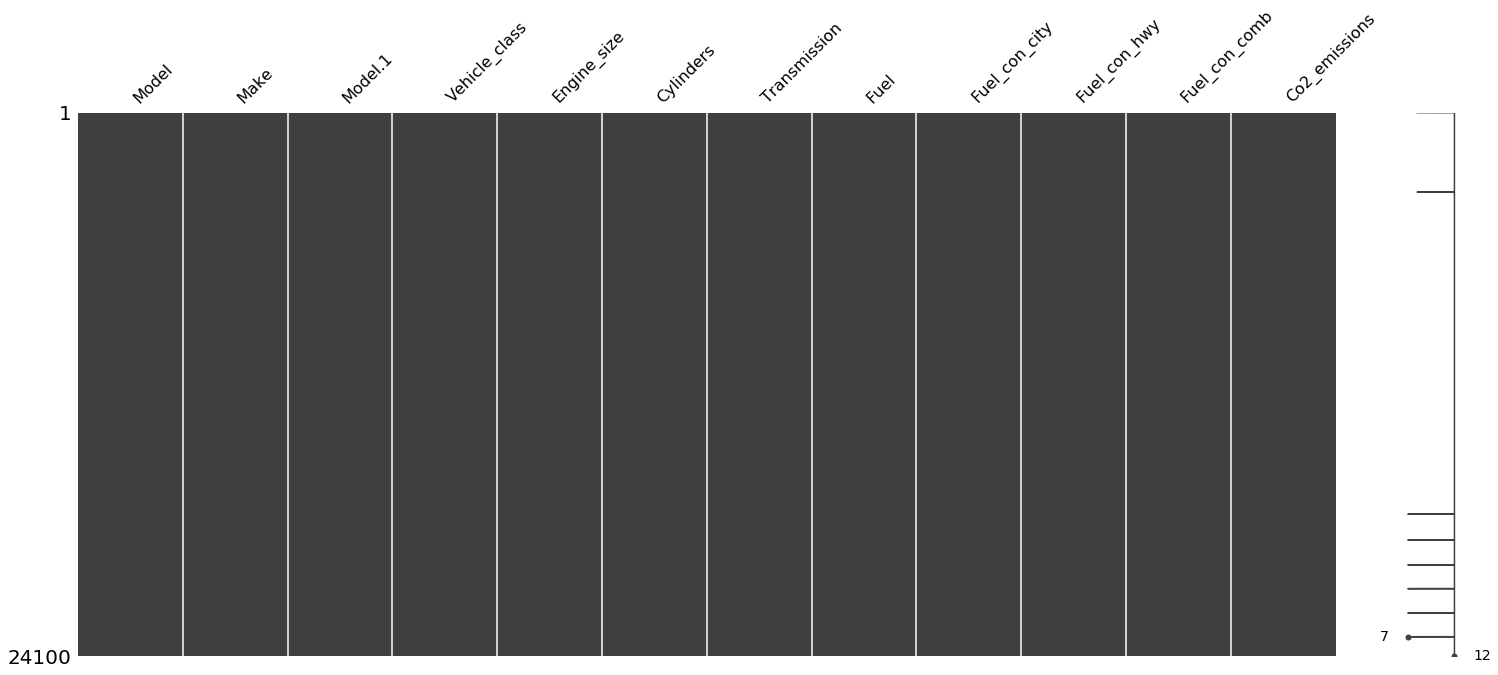

In [19]:
msno.matrix(data)

**We can see that the index of the rows which has missing values in them are the same for all the features.**  
**The reason behind this is these rows are similar to the first row in our dataset, which are basically the feature explanation part present in the CSV source file.**  
(**So the logical next step is to discard all these rows, as we do not need them in our analysis**

In [20]:
data.dropna(axis = 0, how = 'any', inplace = True)
data.shape

(24092, 12)

In [21]:
# resetting the index, because we droped some rows
data.reset_index(drop=True, inplace=True)

**Okay so let's explore the features further.**

**As we dont need the first three identity columns in our analysis, lets merge them into a single column.**

In [22]:
# merging the desired the ID featuring columns into one column as 'Year_make_model'
data['Year_make_model'] = data[['Model', 'Make', 'Model.1']].agg('-'.join, axis=1)
# dropping the original individual columns
data = data.drop(['Model', 'Make', 'Model.1'], 1)
# now lets rearrange the columns to get the merged column up in the front, by making a list of the column names in a desired arrangement
cols = ['Year_make_model', 'Vehicle_class', 'Engine_size', 'Cylinders', 'Transmission', 'Fuel', 'Fuel_con_city', 'Fuel_con_hwy', 'Fuel_con_comb', 'Co2_emissions']
data = data[cols]
data.head()

Year_make_model Vehicle_class Engine_size  Cylinders Transmission  \
0       1995-ACURA-INTEGRA    SUBCOMPACT         1.8        4.0           A4   
1       1995-ACURA-INTEGRA    SUBCOMPACT         1.8        4.0           M5   
2  1995-ACURA-INTEGRA GS-R    SUBCOMPACT         1.8        4.0           M5   
3        1995-ACURA-LEGEND       COMPACT         3.2        6.0           A4   
4  1995-ACURA-LEGEND COUPE       COMPACT         3.2        6.0           A4   

  Fuel Fuel_con_city Fuel_con_hwy Fuel_con_comb Co2_emissions  
0    X          10.2            7           8.8           202  
1    X           9.6            7           8.4           193  
2    Z           9.4            7           8.3           191  
3    Z          12.6          8.9          10.9           251  
4    Z            13          9.3          11.3           260

**Checking the data types of our features in our dataset.**

In [23]:
data.dtypes

Year_make_model     object
Vehicle_class       object
Engine_size         object
Cylinders          float64
Transmission        object
Fuel                object
Fuel_con_city       object
Fuel_con_hwy        object
Fuel_con_comb       object
Co2_emissions       object
dtype: object

**As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'.**  
**Okay so lets change the dtypes of some of the columns.**

In [24]:
data.Engine_size = data.Engine_size.astype(str).astype(float)
data.Cylinders = data.Cylinders.astype(int)
data.Fuel_con_city = data.Fuel_con_city.astype(float)
data.Fuel_con_hwy = data.Fuel_con_hwy.astype(float)
data.Fuel_con_comb = data.Fuel_con_comb.astype(float)
data.Co2_emissions = data.Co2_emissions.astype(int)

data.dtypes

Year_make_model     object
Vehicle_class       object
Engine_size        float64
Cylinders            int32
Transmission        object
Fuel                object
Fuel_con_city      float64
Fuel_con_hwy       float64
Fuel_con_comb      float64
Co2_emissions        int32
dtype: object

# Outlier detection and removal

In [25]:
from Outliers import Outlier_detector_and_remover

In [26]:
print(Outlier_detector_and_remover.__doc__)


	This is a class for detecting and removal of utliers in a feature of a dataframe.

	Availaible methods for this class are as follows :

		* 'TUKEY_outlier_detector' >> Detection of outliers in a feature of a dataframe, utilising IQR.
		* 'TUKEY_outlier_remover' >> Removal of outliers in a feature of a dataframe, utilising IQR.

	Class parameters are as follows :
		* dataframe - name of the dataframe of the data in use.
		* feature - name of the feature in the dataframe, to detect and manage the outliers.
	


**Outlier detection.**

In [27]:
'''Because of the fact that we don't have a lot of features, 
we can manually list the numerical featuresin our dataset, for the purpose of outlier detection and removal.'''
numerical_features = ['Engine_size', 'Cylinders', 'Fuel_con_city', 'Fuel_con_hwy', 'Fuel_con_comb', 'Co2_emissions']

for nf in numerical_features :
    print('------------Outlier detection report for the feature "{}-------------"'.format(nf))
    Outlier_detector_and_remover(data, nf, 'detection').operate()

------------Outlier detection report for the feature "Engine_size-------------"
interquartile range: 2.0
upper_inner_fence: 7.3
lower_inner_fence: -0.7000000000000002
upper_outer_fence: 10.3
lower_outer_fence: -3.7
percentage of records out of inner fences for Engine_size is: 0.17
percentage of records out of outer fences for Engine_size is: 0.00
------------Outlier detection report for the feature "Cylinders-------------"
interquartile range: 4.0
upper_inner_fence: 14.0
lower_inner_fence: -2.0
upper_outer_fence: 20.0
lower_outer_fence: -8.0
percentage of records out of inner fences for Cylinders is: 0.02
percentage of records out of outer fences for Cylinders is: 0.00
------------Outlier detection report for the feature "Fuel_con_city-------------"
interquartile range: 4.300000000000001
upper_inner_fence: 21.25
lower_inner_fence: 4.049999999999999
upper_outer_fence: 27.700000000000003
lower_outer_fence: -2.400000000000002
percentage of records out of inner fences for Fuel_con_city is:

**Summary statistics before outlier detection and removal, for aiding the analysis of the presence and absence of outliers in our data.**

In [28]:
data.describe()

Engine_size     Cylinders  Fuel_con_city  Fuel_con_hwy  Fuel_con_comb  \
count  24092.000000  24092.000000   24092.000000  24092.000000   24092.000000   
mean       3.369077      5.857463      12.843106      8.905114      11.071625   
std        1.338363      1.781406       3.462665      2.267760       2.890290   
min        0.800000      2.000000       3.500000      3.200000       3.600000   
25%        2.300000      4.000000      10.500000      7.300000       9.100000   
50%        3.000000      6.000000      12.400000      8.400000      10.600000   
75%        4.300000      8.000000      14.800000     10.200000      12.800000   
max        8.400000     16.000000      30.600000     20.600000      26.100000   

       Co2_emissions  
count   24092.000000  
mean      250.925203  
std        59.512462  
min        83.000000  
25%       209.000000  
50%       244.000000  
75%       289.000000  
max       570.000000

In [29]:
# Outlier removal from OUTER FENCE using the TUKEY IQR METHOD
for nf in numerical_features :
    print('------------Outlier removal report for the feature "{}" from outer fence-------------'.format(nf))
    data = Outlier_detector_and_remover(data, nf, 'removal').operate()

------------Outlier removal report for the feature "Engine_size" from outer fence-------------
State the fence type to remove outliers relative to it :outer
length of input dataframe: 24092
length of new dataframe after outlier removal: 24092
------------Outlier removal report for the feature "Cylinders" from outer fence-------------
State the fence type to remove outliers relative to it :outer
length of input dataframe: 24092
length of new dataframe after outlier removal: 24092
------------Outlier removal report for the feature "Fuel_con_city" from outer fence-------------
State the fence type to remove outliers relative to it :outer
length of input dataframe: 24092
length of new dataframe after outlier removal: 24081
------------Outlier removal report for the feature "Fuel_con_hwy" from outer fence-------------
State the fence type to remove outliers relative to it :outer
length of input dataframe: 24081
length of new dataframe after outlier removal: 24076
------------Outlier removal

In [30]:
# length of data after removing the outliers from the OUTER FENCE
data.shape

(24076, 10)

In [31]:
# Outlier removal from INNER FENCE using the TUKEY IQR METHOD
for nf in numerical_features :
    print('------------Outlier removal report for the feature "{}" from inner fence-------------'.format(nf))
    data = Outlier_detector_and_remover(data, nf, 'removal').operate()

------------Outlier removal report for the feature "Engine_size" from inner fence-------------
State the fence type to remove outliers relative to it :inner
length of input dataframe: 24076
length of new dataframe after outlier removal: 24034
------------Outlier removal report for the feature "Cylinders" from inner fence-------------
State the fence type to remove outliers relative to it :inner
length of input dataframe: 24034
length of new dataframe after outlier removal: 24034
------------Outlier removal report for the feature "Fuel_con_city" from inner fence-------------
State the fence type to remove outliers relative to it :inner
length of input dataframe: 24034
length of new dataframe after outlier removal: 23535
------------Outlier removal report for the feature "Fuel_con_hwy" from inner fence-------------
State the fence type to remove outliers relative to it :inner
length of input dataframe: 23535
length of new dataframe after outlier removal: 23327
------------Outlier removal

In [32]:
# Length of data after outlier removal from the INNER FENCE
data.shape

(23190, 10)

**Summary statistics after outlier detection and removal from our data.**

In [33]:
data.describe()

Engine_size     Cylinders  Fuel_con_city  Fuel_con_hwy  Fuel_con_comb  \
count  23190.000000  23190.000000   23190.000000  23190.000000   23190.000000   
mean       3.286149      5.757180      12.510052      8.683933      10.788948   
std        1.274418      1.704376       2.995501      1.949624       2.488875   
min        0.800000      2.000000       4.200000      3.800000       4.200000   
25%        2.300000      4.000000      10.400000      7.300000       9.100000   
50%        3.000000      6.000000      12.200000      8.300000      10.500000   
75%        4.000000      6.000000      14.400000     10.000000      12.400000   
max        7.000000     12.000000      21.200000     14.200000      17.600000   

       Co2_emissions  
count   23190.000000  
mean      246.884864  
std        55.065577  
min        99.000000  
25%       209.000000  
50%       241.000000  
75%       282.000000  
max       393.000000

**Observed changes in the 'mean' and 'std' of the numerical feature after removal of outliers from our data.** 

| Observation | Engine_size | Cylinders | Fuel_con_city | Fuel_con_hwy | Fuel_con_comb | Co2_emissioins
--- | --- | --- | --- | --- | --- | --- |
$\Delta$ mean | -0.08292799999999989 | -0.10028300000000012 | -0.3330540000000006 | -0.22118099999999963 | -0.2826769999999996 | -4.040339000000017
$\Delta$ std | -0.06394499999999992 | -0.07703000000000015 | -0.4671639999999999 | -0.318136 | -0.40141499999999963 | -4.446885000000002

**As we can clearly observe from the table above that the mean has decreased for all the numeical features in our dataset after removal of the outliers from them.**  
**This implies that the mean has shifted towards left (i.e. the decrease or the negetive sign), which inturn increases the chances of our model in producing a more accurate prediction of the C02 emission levels, because of the fact that these features are now better representing the instances which can occur in reality.**  
**This change in mean for our numerical features, has also led to a decreased variance in those features, which implies that we have better quality data than we started with in the cases of the numerical features.**

In [34]:
# resetting the index, because we droped some rows while removing outliers from our dataset.
data.reset_index(drop=True, inplace=True)

# Feature exploration and additional cleaning of the features.

### Exploring the feature 'Vehicle_class'.

**Let's check the different classes of the feature.**

In [35]:
data['Vehicle_class'].value_counts()

COMPACT                     3311
SUV                         2904
MID-SIZE                    2820
PICKUP TRUCK - STANDARD     2171
SUBCOMPACT                  2130
FULL-SIZE                   1332
TWO-SEATER                  1069
SUV - SMALL                 1004
MINICOMPACT                  910
STATION WAGON - SMALL        849
SUV - STANDARD               579
MINIVAN                      567
PICKUP TRUCK - SMALL         497
STATION WAGON - MID-SIZE     475
VAN - CARGO                  377
SUV: Small                   350
VAN - PASSENGER              276
Mid-size                     260
Compact                      193
SUV: Standard                190
Subcompact                   185
Pickup truck: Standard       172
Full-size                    171
Two-seater                   103
Minicompact                   71
SPECIAL PURPOSE VEHICLE       62
Station wagon: Small          60
Pickup truck: Small           44
Special purpose vehicle       24
Minivan                       16
Station wa

**As we can clearly see that there are classes belonging to essentially the same class, but are represented here as different because of the case-difference of the strings.**  
**For example : 'COMPACT' and 'Compact' - they belong to the same class but by being case different, they are detected as different classes.**  
**This issue of miss-representation can be solved by changing the case of the classes in this feature to a benchmark, i.e. upper-case or lower-case of the stings representing all the classes.**

In [36]:
# setting the case of the feature 'Vehicle_class' to a benchmark upper-case.
data['Vehicle_class'] = data['Vehicle_class'].str.upper() 

**Now let's check the different classes of the feature 'Vehicle_class'.**

In [37]:
data['Vehicle_class'].value_counts()

COMPACT                     3504
MID-SIZE                    3080
SUV                         2904
SUBCOMPACT                  2315
PICKUP TRUCK - STANDARD     2171
FULL-SIZE                   1503
TWO-SEATER                  1172
SUV - SMALL                 1004
MINICOMPACT                  981
STATION WAGON - SMALL        849
MINIVAN                      583
SUV - STANDARD               579
PICKUP TRUCK - SMALL         497
STATION WAGON - MID-SIZE     475
VAN - CARGO                  377
SUV: SMALL                   350
VAN - PASSENGER              276
SUV: STANDARD                190
PICKUP TRUCK: STANDARD       172
SPECIAL PURPOSE VEHICLE       86
STATION WAGON: SMALL          60
PICKUP TRUCK: SMALL           44
STATION WAGON: MID-SIZE       14
VAN: PASSENGER                 4
Name: Vehicle_class, dtype: int64

**Still we can clearly see another pattern of miss-representation of values in the this feature.**  
**In this issue two same values have been represented in two different ways, making them appear to be two different classes of the feature.**  
**For example :'PICKUP TRUCK - STANDARD' and 'PICKUP TRUCK: STANDARD' or 'SUV - SMALL' and 'SUV: SMALL' - are essentially the same class but are not same in their representation.**
**This issue can be solved by replacing either '-' or ':' with the other one, hence making the representation standard across the feature. We will be replacing the ':' with '-' because the number of instances of the feature with ':' are less when compared to the number of instances of the feature with '-'; which inturn makes it less compuationally expensive to apply.**

In [38]:
data.shape

(23190, 10)

In [39]:
for ind in list(data.index):
    data.iloc[ind,1] = data.iloc[ind, 1].replace(':', ' -')

**Now let's check if that solved the issue.**

In [40]:
data['Vehicle_class'].value_counts()

COMPACT                     3504
MID-SIZE                    3080
SUV                         2904
PICKUP TRUCK - STANDARD     2343
SUBCOMPACT                  2315
FULL-SIZE                   1503
SUV - SMALL                 1354
TWO-SEATER                  1172
MINICOMPACT                  981
STATION WAGON - SMALL        909
SUV - STANDARD               769
MINIVAN                      583
PICKUP TRUCK - SMALL         541
STATION WAGON - MID-SIZE     489
VAN - CARGO                  377
VAN - PASSENGER              280
SPECIAL PURPOSE VEHICLE       86
Name: Vehicle_class, dtype: int64

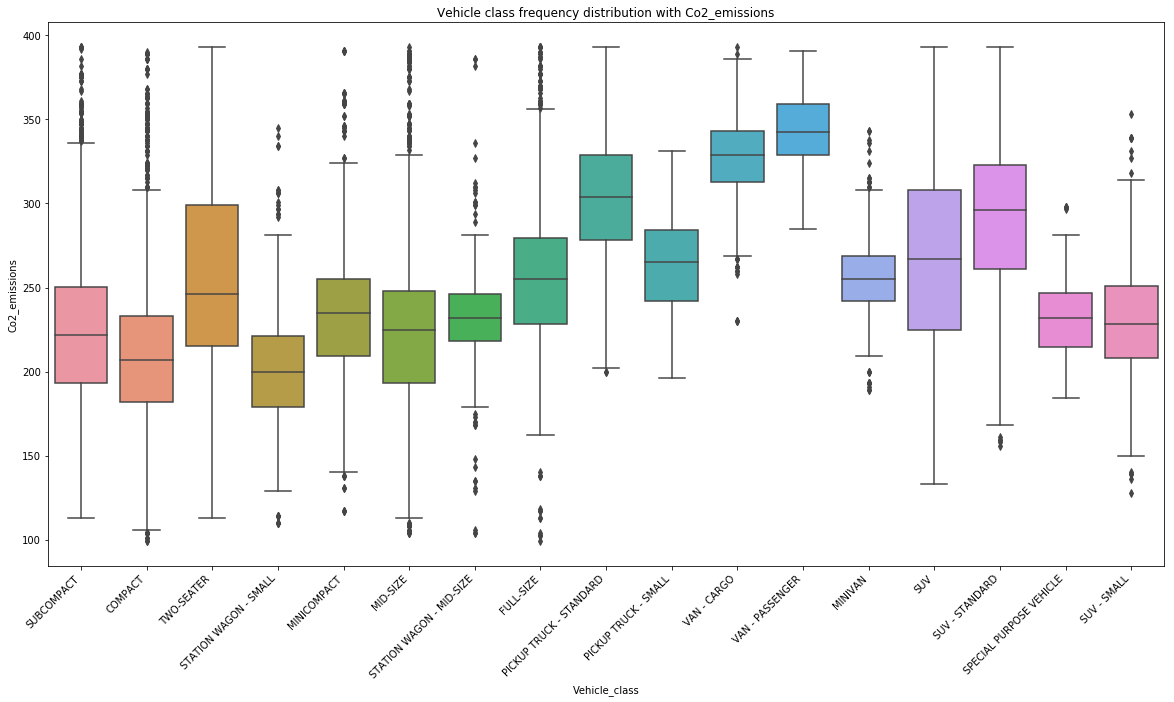

In [41]:
# Let's visualize the above output for the Vehicle_class feature with respect to Co2 emissions.
plt.figure(figsize=(20,10))
sns.boxplot(x=data['Vehicle_class'], y=data['Co2_emissions'], data=data)
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Vehicle_class')
plt.ylabel('Co2_emissions')
plt.title('Vehicle class frequency distribution with Co2_emissions')
plt.show()

**We see that the distributions of Co_2 emissions between the different vehicle class categories have an intermediate overlap, and so the Vehicle_class feature would be an intermediate predictor of Co_2 emissions.**

**Let's see the relation among the classes of 'Vehicle_class' and our target 'Co2_emissions'.**

In [42]:
VC_Co2 = data[['Vehicle_class','Co2_emissions']]  # making a seperate df of the two features in question for our analysis
VC_Co2 = VC_Co2.groupby(['Vehicle_class'],as_index=False).mean()  # grouping the df by  the classes in Vehicle_class
VC_Co2.sort_values("Co2_emissions", axis = 0, ascending = True,
                 inplace = True, na_position ='last') # soting those groupings in ascending order
VC_Co2

Vehicle_class  Co2_emissions
9      STATION WAGON - SMALL     202.638064
0                    COMPACT     211.346461
2                   MID-SIZE     223.537662
10                SUBCOMPACT     224.717063
12               SUV - SMALL     230.089365
8   STATION WAGON - MID-SIZE     230.752556
7    SPECIAL PURPOSE VEHICLE     231.569767
3                MINICOMPACT     233.038736
4                    MINIVAN     256.072041
14                TWO-SEATER     256.680887
1                  FULL-SIZE     257.213573
5       PICKUP TRUCK - SMALL     262.839187
11                       SUV     269.882920
13            SUV - STANDARD     292.746424
6    PICKUP TRUCK - STANDARD     303.790013
15               VAN - CARGO     326.572944
16           VAN - PASSENGER     343.625000

**From our data, it seems that vehicles in the <u>STATION WAGON - SMALL</u>	 class are, on average, the <u>least</u> expensive in terms of Co2 emissions by cars.**  
**On the other hand, vehicles in the class <u>VAN - PASSENGER</u> are the <u>most</u> expensive in terms of Co2 emissoins by cars.**

### Exploring the feature 'Engine_size'.

C:\Users\Tradeoff\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


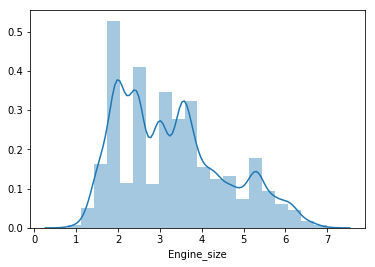

In [43]:
sns.distplot( data['Engine_size'], bins=20 )

In [44]:
data['Engine_size'].describe()

count    23190.000000
mean         3.286149
std          1.274418
min          0.800000
25%          2.300000
50%          3.000000
75%          4.000000
max          7.000000
Name: Engine_size, dtype: float64

In [45]:
print("The MEDIAN and MODE of the feature 'Engine_size' are respectively {} and {}".format(data['Engine_size'].median(), data['Engine_size'].mode()))

The MEDIAN and MODE of the feature 'Engine_size' are respectively 3.0 and 0    2.0
dtype: float64


**The value in the feature Engine_size represents the total volume of air and fuel that is pushed through the engine by its cylinder. Generally, the bigger the engine size the more powerful it is.**  
**We can see that the feature Engine_size in out dataset is positively skewed.**  
**This is due to the reason that these are light-duty vehicles for retail sale, and hence are not meant to be have a very powerful engine because it is not necessary for these kind of vehicles.**

**Let's check the statistical significance of the correlation between <u>Engine_size</u> and <u>Co2_emissions</u>, by hypothesis testing using p-value.**

**Null hypothesis** - The correlation coefficient IS NOT significantly different from 0. There IS NOT a significant linear relationship(correlation) between <u>Engine_size</u> and <u>Co2_emissions</u> in the population.  

**Alternate hypothesis** - The correlation coefficient IS significantly DIFFERENT FROM 0. There IS A SIGNIFICANT LINEAR RELATIONSHIP (correlation) between <u>Engine_size</u> and <u>Co2_emissions</u> in the population.

In [46]:
pearson_coef, p_value  = stats.spearmanr(data.Engine_size, data.Co2_emissions)
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.840980436479191  with a P-value of P = 0.0


**Since the p-value is  <  0.001, the correlation between Engine_size and Co2_emissions is highly significant, and there is a significant linear relationship between the two.**

C:\Users\Tradeoff\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


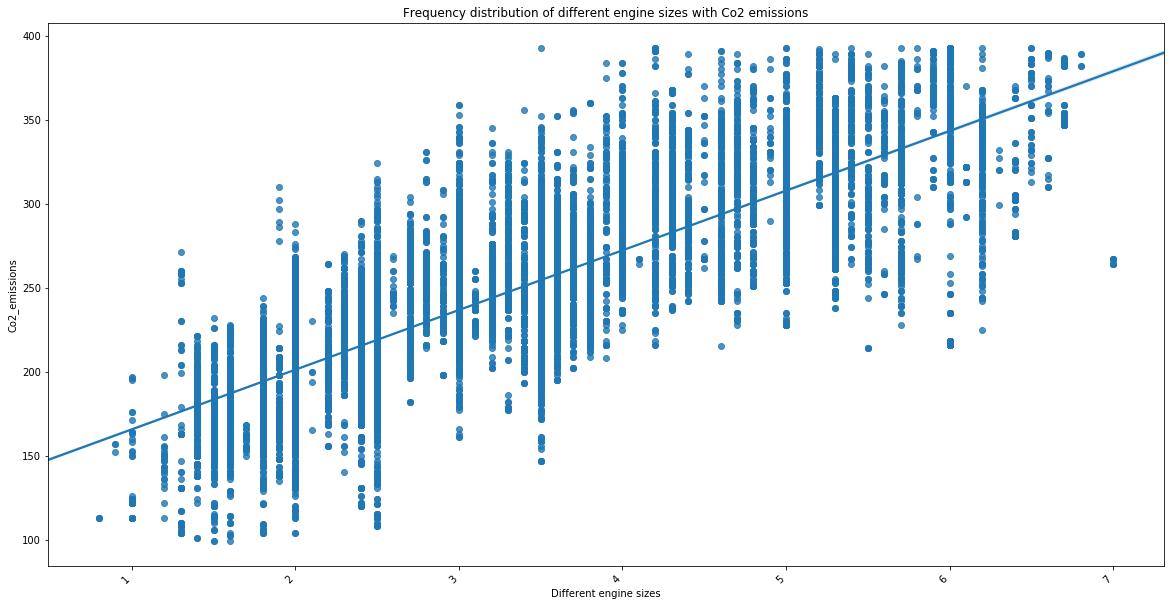

In [47]:
# Engine size as potential predictor variable of Co2 emissions.
plt.figure(figsize=(20,10))
sns.regplot(x="Engine_size", y="Co2_emissions", data=data)
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Different engine sizes')
plt.ylabel('Co2_emissions')
plt.title('Frequency distribution of different engine sizes with Co2 emissions')
plt.show()

**As the engine size goes up, the Co2 emissions goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of Co2 emissions, since the regression line is almost a perfect diagonal line.**  

### Exploring the feature 'Cylinders'.

**Let's check the different classes of the feature.**

In [48]:
data['Cylinders'].value_counts()

6     8743
4     8395
8     4881
5      590
12     330
3      123
10     111
2       17
Name: Cylinders, dtype: int64

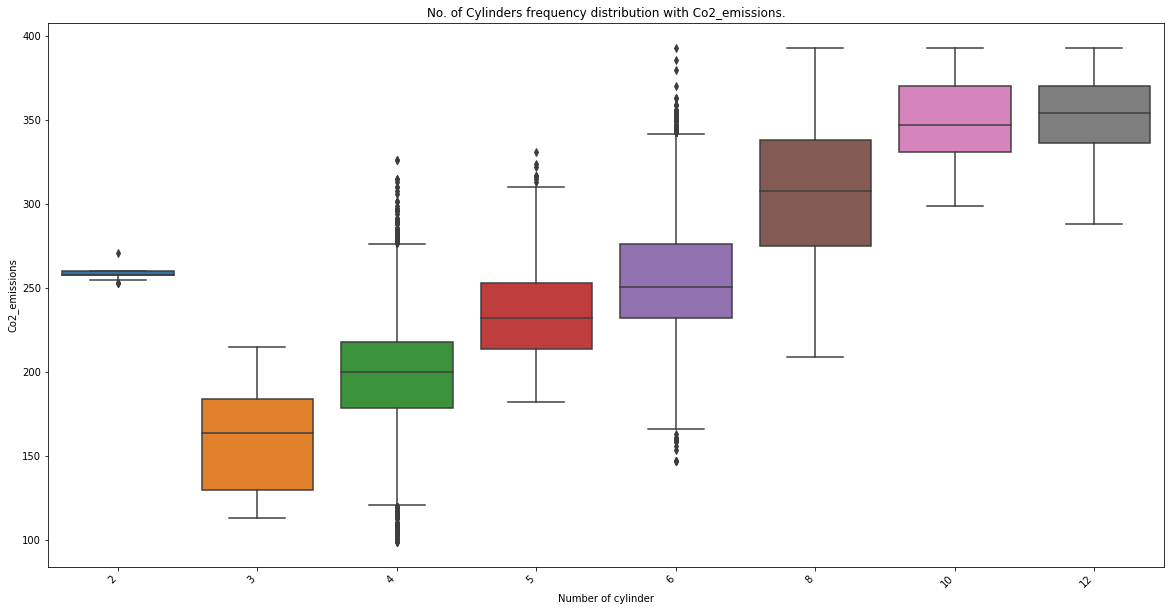

In [49]:
# Let's visualize the above output for the feature Cylinders
plt.figure(figsize=(20,10))
sns.boxplot(x=data['Cylinders'], y=data['Co2_emissions'], data=data)
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Number of cylinder')
plt.ylabel('Co2_emissions')
plt.title('No. of Cylinders frequency distribution with Co2_emissions.')
plt.show()

**Here we see that the distribution of Co2_emissons between the different number of cylinders in a car engine, are distinct enough to take Cylinders as a potential good predictor of Co2_emissions.**

**Let's see the relation among the classes of 'Cylinders' and our target 'Co2_emissions'.**

In [50]:
CY_Co2 = data[['Cylinders','Co2_emissions']] # making a seperate df of the two features in question for our analysis
CY_Co2 = CY_Co2.groupby(['Cylinders'],as_index=False).mean() # grouping the df by  the classes in Cylinders
CY_Co2.sort_values("Co2_emissions", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') # soting those groupings in ascending order
CY_Co2

Cylinders  Co2_emissions
1          3     161.796748
2          4     198.697320
3          5     234.825424
4          6     255.535743
0          2     258.176471
5          8     308.378611
6         10     348.270270
7         12     352.593939

**From our data, it seems that vehicles with 3 cylinders are, on average, the least expensive in terms of Co2 emissions by cars.**  
**And vehicles with 12 cylinders are on average most expensive in terms of Co2 emissoins by car.**  

### Exploring the feature 'Transmission'.

**Let's check the different classes of the feature.**

In [51]:
data['Transmission'].value_counts()

A4      5141
M5      3186
AS6     2681
M6      2441
A6      1718
A5      1534
AS8     1280
AS5      865
AV       712
A8       587
AS7      585
AM7      503
A9       335
A7       272
AS4      258
AM6      190
A3       175
AS10     148
AV6      125
AV7      121
M7       102
AS9       75
AM8       62
AV8       40
A10       31
AV10      11
AM5        6
AM9        3
M4         3
Name: Transmission, dtype: int64

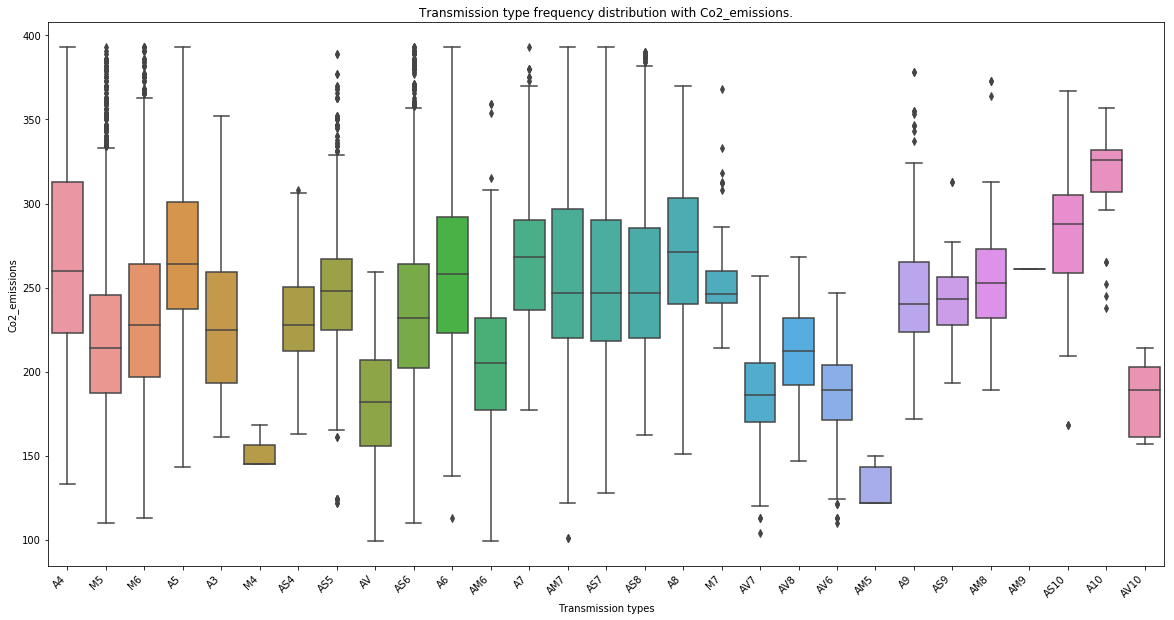

In [52]:
# Let's visualize the above output for the Transmission feature
plt.figure(figsize=(20,10))
sns.boxplot(x=data['Transmission'], y=data['Co2_emissions'], data=data)
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Transmission types')
plt.ylabel('Co2_emissions')
plt.title('Transmission type frequency distribution with Co2_emissions.')
plt.show()

**Here we see that the distribution of Co2_emissons between the different type of transmission in a car engine, are partially distinct enough to take Transmission as a potential good predictor of Co2_emissions.**

**Let's see the relation among the classes of 'Transmission' and our target 'Co2_emissions'.**

In [53]:
TR_Co2 = data[['Transmission', 'Co2_emissions']] # making a seperate df of the two features in question for our analysis
TR_Co2 = TR_Co2.groupby(['Transmission'],as_index=False).mean() # grouping the df by  the classes in Transmission.
TR_Co2.sort_values("Co2_emissions", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') # soting those groupings in ascending order
TR_Co2

Transmission  Co2_emissions
8           AM5     131.333333
25           M4     152.666667
20           AV     179.601124
21         AV10     185.090909
22          AV6     185.840000
23          AV7     189.991736
9           AM6     207.426316
24          AV8     214.125000
26           M5     223.133396
14          AS4     232.155039
27           M6     234.112659
1            A3     234.148571
16          AS6     239.599403
19          AS9     242.986667
7            A9     246.441791
15          AS5     249.517919
28           M7     250.764706
11          AM8     253.661290
18          AS8     255.960938
17          AS7     256.401709
10          AM7     256.914513
4            A6     257.990105
12          AM9     261.000000
2            A4     266.403034
6            A8     268.621806
3            A5     269.438070
5            A7     270.139706
13         AS10     281.682432
0           A10     315.161290

**From our data, it seems that vehicles with AM5 type of transmission are, on average, the least expensive in terms of Co2 emissions by cars.**  
**And vehicles with A10 type of transmission are on average most expensive in terms of Co2 emissoins by cars.**

### Exploring the feature 'Fuel'.

**Let's check the different clases of the feature.**

In [54]:
data['Fuel'].value_counts()

X    13419
Z     8798
E      603
D      348
N       22
Name: Fuel, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

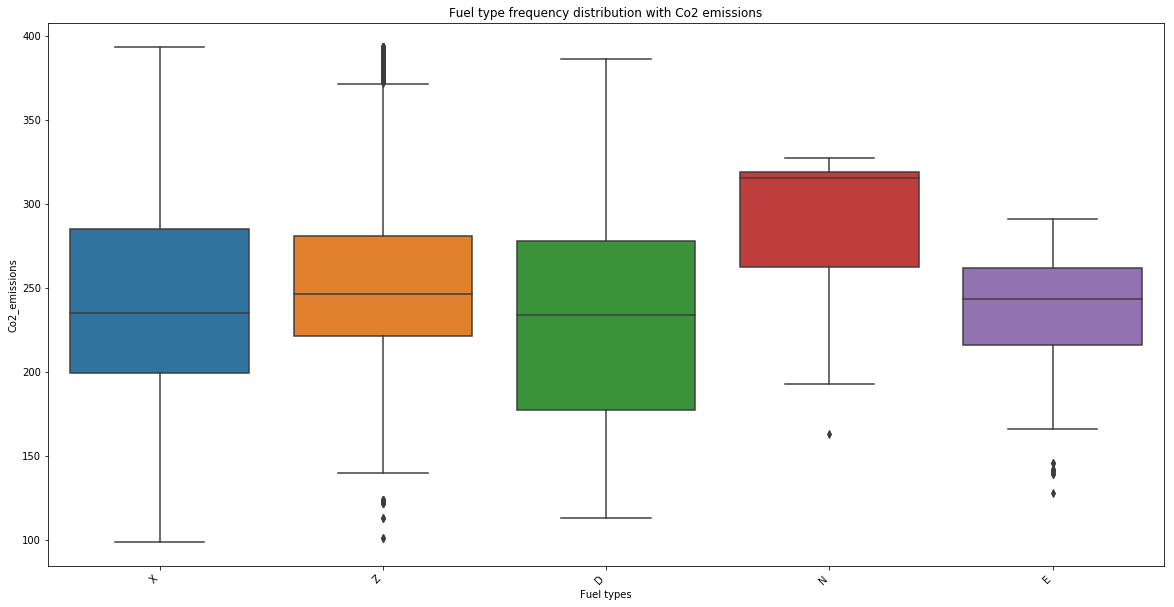

In [55]:
# Let's visualize the above output for the Fuel feature
plt.figure(figsize=(20,10))
sns.boxplot(x=data.Fuel, y=data.Co2_emissions, data=data)
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Fuel types')
plt.ylabel('Co2_emissions')
plt.title('Fuel type frequency distribution with Co2 emissions')
plt.show

**We see that the distributions of Co_2 emissions between the different fuel types used in car have an intermediate overlap, and so the Fuel feature would be an intermediate predictor of Co_2 emissions.**

**Lets see the relation among 'Fuel'and 'Co2_emissions'.**

In [56]:
FU_Co2 = data[['Fuel', 'Co2_emissions']]  # making a seperate df of the two features in question for our analysis
FU_Co2 = FU_Co2.groupby(['Fuel'],as_index=False).mean() # grouping the df by  the classes in Fuel.
FU_Co2.sort_values("Co2_emissions", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') # soting those groupings in ascending order
FU_Co2

Fuel  Co2_emissions
0    D     236.103448
1    E     237.630182
3    X     242.844698
4    Z     254.000682
2    N     289.727273

**From our data, it seems that vehicles using the D type of fuel are, on average, the least expensive in terms of Co2 emissions by cars.**  
**And vehicles using the N type of fuel are on average most expensive in terms of Co2 emissoins by cars.**

### Exploring the feature 'Fuel_con_city'.

C:\Users\Tradeoff\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


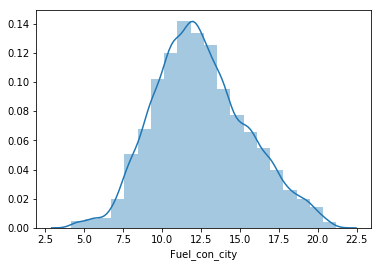

In [57]:
sns.distplot( data['Fuel_con_city'], bins=20 )

In [58]:
data['Fuel_con_city'].describe()

count    23190.000000
mean        12.510052
std          2.995501
min          4.200000
25%         10.400000
50%         12.200000
75%         14.400000
max         21.200000
Name: Fuel_con_city, dtype: float64

In [59]:
print("The MEDIAN and MODE of the feature 'Engine_size' are respectively {} and {}".format(data['Fuel_con_city'].median(), data['Fuel_con_city'].mode()))

The MEDIAN and MODE of the feature 'Engine_size' are respectively 12.2 and 0    11.9
dtype: float64


**Let's check the statistical significance of the correlation between <u>Fuel_con_city</u> and <u>Co2_emissions</u>, by hypothesis testing using p-value.**

**Null hypothesis** - The correlation coefficient IS NOT significantly different from 0. There IS NOT a significant linear relationship(correlation) between <u>Fuel_con_city</u> and <u>Co2_emissions</u> in the population.  

**Alternate hypothesis** - The correlation coefficient IS significantly DIFFERENT FROM 0. There IS A SIGNIFICANT LINEAR RELATIONSHIP (correlation) between <u>Fuel_con_city</u> and <u>Co2_emissions</u> in the population.

In [60]:
pearson_coef, p_value  = stats.spearmanr(data['Fuel_con_city'], data['Co2_emissions'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.9563457574895654  with a P-value of P = 0.0


**Since the p-value is  <  0.001, the correlation between Fuel_con_city and Co2_emissions is highly significant, and there is a significant linear relationship between the two.**

C:\Users\Tradeoff\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


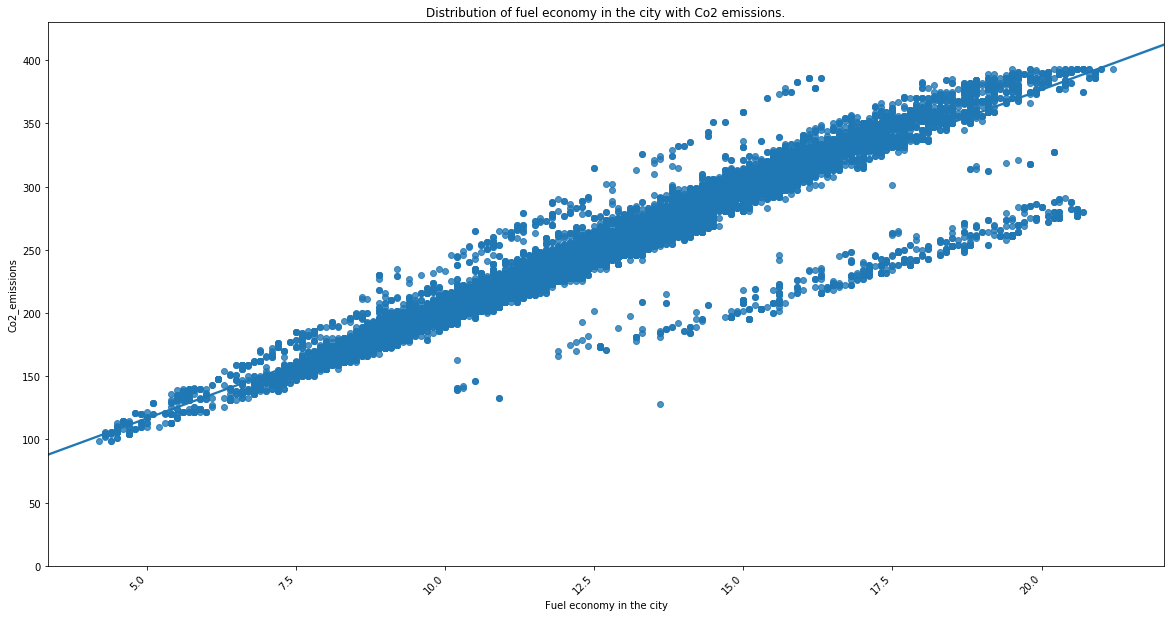

In [61]:
## Fuel consumption by cars in city roads as potential predictor variable of Co2 emissions.
plt.figure(figsize=(20,10))
sns.regplot(x="Fuel_con_city", y="Co2_emissions", data=data)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylim(0,)
plt.xlabel('Fuel economy in the city')
plt.ylabel('Co2_emissions')
plt.title('Distribution of fuel economy in the city with Co2 emissions.')
plt.show()

**As the fuel consumption by cars in city conditins goes up, the Co2 emissions  also goes up: this indicates a positive direct correlation between these two variables, and it also seems a pretty good predictor of Co2 emissions, since the regression line is almost a perfect diagonal line.**  

### Exploring the feature 'Fuel_con_hwy'.

C:\Users\Tradeoff\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


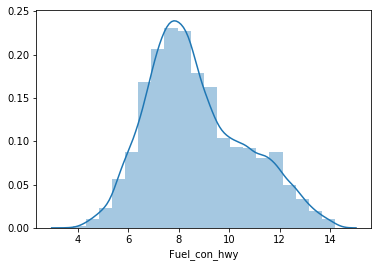

In [62]:
sns.distplot( data['Fuel_con_hwy'], bins=20 )

In [63]:
data['Fuel_con_hwy'].describe()

count    23190.000000
mean         8.683933
std          1.949624
min          3.800000
25%          7.300000
50%          8.300000
75%         10.000000
max         14.200000
Name: Fuel_con_hwy, dtype: float64

In [64]:
print("The MEDIAN and MODE of the feature 'Engine_size' are respectively {} and {}".format(data['Fuel_con_hwy'].median(), data['Fuel_con_hwy'].mode()))

The MEDIAN and MODE of the feature 'Engine_size' are respectively 8.3 and 0    7.8
dtype: float64


**Let's check the statistical significance of the correlation between <u>Fuel_con_hwy</u> and <u>Co2_emissions</u>, by hypothesis testing using p-value.**

**Null hypothesis** - The correlation coefficient IS NOT significantly different from 0. There IS NOT a significant linear relationship(correlation) between <u>Fuel_con_hwy</u> and <u>Co2_emissions</u> in the population.  

**Alternate hypothesis** - The correlation coefficient IS significantly DIFFERENT FROM 0. There IS A SIGNIFICANT LINEAR RELATIONSHIP (correlation) between <u>Fuel_con_hwy</u> and <u>Co2_emissions</u> in the population.

In [65]:
pearson_coef, p_value  = stats.spearmanr(data['Fuel_con_hwy'], data['Co2_emissions'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.9442292130443461  with a P-value of P = 0.0


**Since the p-value is  <  0.001, the correlation between Fuel_con_hwy and Co2_emissions is highly significant, and there is a significant linear relationship between the two.**

C:\Users\Tradeoff\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


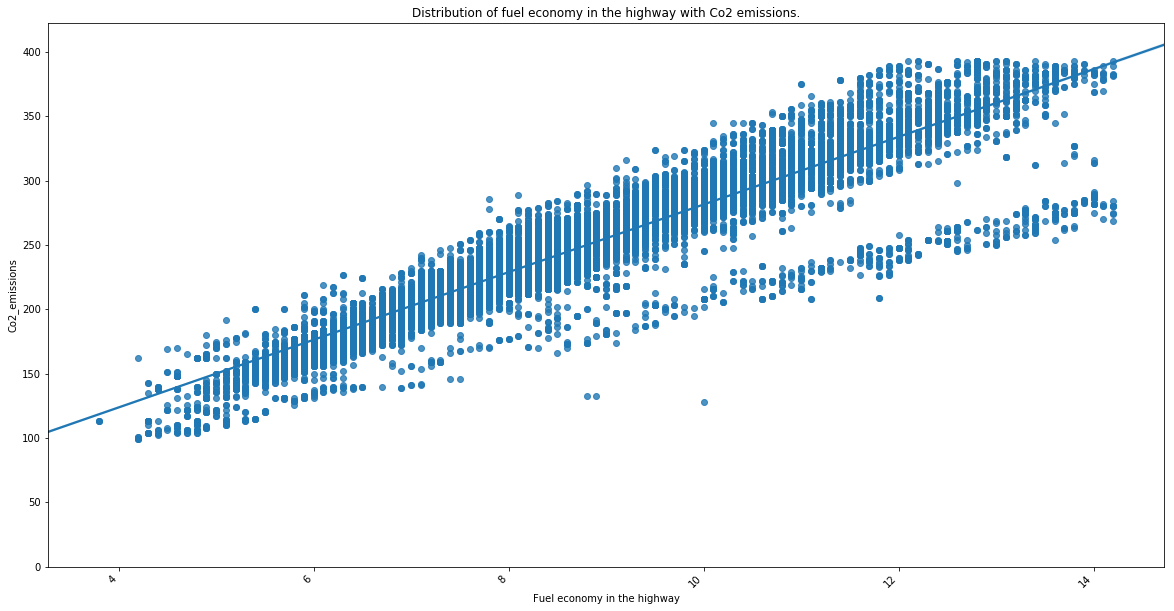

In [66]:
## Fuel consumption by cars in highway roads as potential predictor variable of Co2 emissions.
plt.figure(figsize=(20,10))
sns.regplot(x="Fuel_con_hwy", y="Co2_emissions", data=data)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylim(0,)
plt.xlabel('Fuel economy in the highway')
plt.ylabel('Co2_emissions')
plt.title('Distribution of fuel economy in the highway with Co2 emissions.')
plt.show()

**As the fuel consumption by cars in highway conditins goes up, the Co2 emissions  also goes up: this indicates a positive direct correlation between these two variables, and it also seems like a pretty good predictor of Co2 emissions, since the regression line is almost a perfect diagonal line.**  

### Exploring the feature 'Fuel_con_comb'.

C:\Users\Tradeoff\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


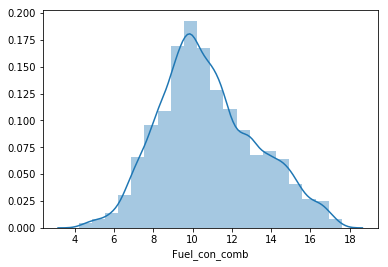

In [67]:
sns.distplot( data['Fuel_con_comb'], bins=20 )

In [68]:
data['Fuel_con_comb'].describe()

count    23190.000000
mean        10.788948
std          2.488875
min          4.200000
25%          9.100000
50%         10.500000
75%         12.400000
max         17.600000
Name: Fuel_con_comb, dtype: float64

In [69]:
print("The MEDIAN and MODE of the feature 'Engine_size' are respectively {} and {}".format(data['Fuel_con_comb'].median(), data['Fuel_con_comb'].mode()))

The MEDIAN and MODE of the feature 'Engine_size' are respectively 10.5 and 0    9.8
dtype: float64


**Let's check the statistical significance of the correlation between <u>Fuel_con_comb</u> and <u>Co2_emissions</u>, by hypothesis testing using p-value.**

**Null hypothesis** - The correlation coefficient IS NOT significantly different from 0. There IS NOT a significant linear relationship(correlation) between <u>Fuel_con_comb</u> and <u>Co2_emissions</u> in the population.  

**Alternate hypothesis** - The correlation coefficient IS significantly DIFFERENT FROM 0. There IS A SIGNIFICANT LINEAR RELATIONSHIP (correlation) between <u>Fuel_con_comb</u> and <u>Co2_emissions</u> in the population.

In [70]:
pearson_coef, p_value  = stats.spearmanr(data['Fuel_con_hwy'], data['Co2_emissions'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.9442292130443461  with a P-value of P = 0.0


**Since the p-value is  <  0.001, the correlation between Fuel_con_comb and Co2_emissions is highly significant, and there is a significant linear relationship between the two.**

C:\Users\Tradeoff\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


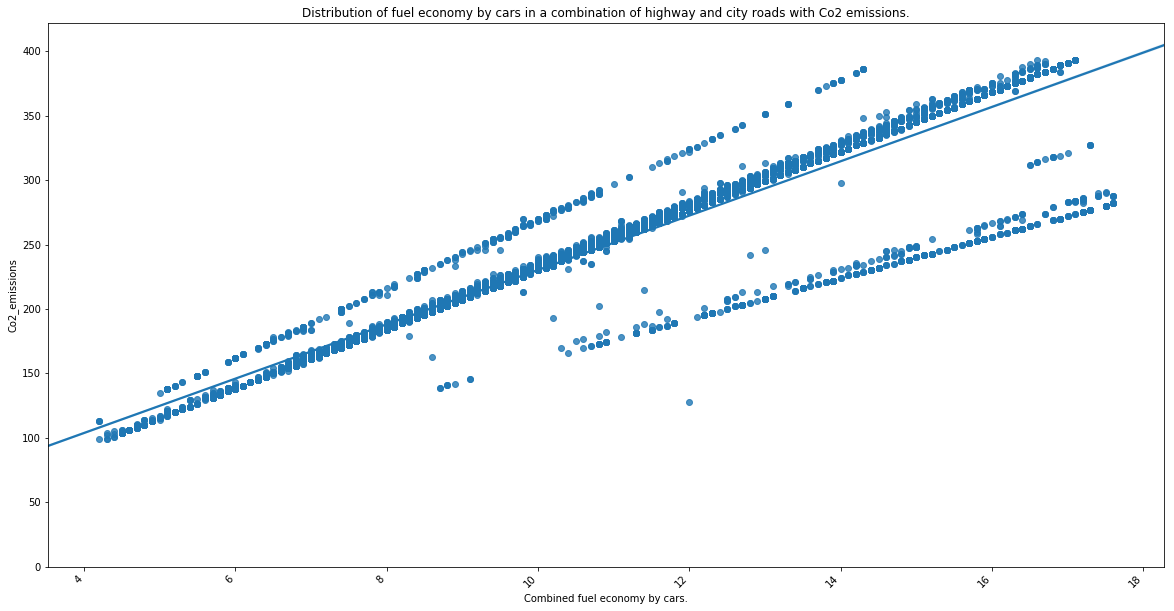

In [71]:
## Fuel consumption by cars in a combination of highway and city roads as potential predictor variable of Co2 emissions.
plt.figure(figsize=(20,10))
sns.regplot(x="Fuel_con_comb", y="Co2_emissions", data=data)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylim(0,)
plt.xlabel('Combined fuel economy by cars.')
plt.ylabel('Co2_emissions')
plt.title('Distribution of fuel economy by cars in a combination of highway and city roads with Co2 emissions.')
plt.show()

**As the fuel consumption by cars in a combination of highway and city conditins goes up, the Co2 emissions  also goes up: this indicates a positive direct correlation between these two variables, and it also seems like a pretty good predictor of Co2 emissions, since the regression line is almost a perfect diagonal line.**  

**From our data, it seems that -**   
* **vehicles in the class TWO-SEATER with 3 cylinders with M5 type of transmission and using X fuel type are, on average the least expensive in terms of Co2 emissions by cars, and**     
* **vehicles  in the class Two-SEATER with 16 cylinders with AM7 type of transmission and using Z fuel type are, on average most expensive in terms of Co2 emissoins by them.**  
* **The features engine_size, Fuel_con_city, Fuel_con_hwy, Fuel_con_comb have a positive linear relation with the taget feature i.e. Co2_emissions, and these continous features are good-intermediate predictors od the target.**

# Feature encoding.

**Let's encode the categorical features in our dataset into numericals, but also retaining the informational pattern in the features.**

In [72]:
'''Due to the fact that we have a significantly less number of features in our dataset,
we can manually identify and list the categorical features in our dataset.'''
Catg_features = ['Vehicle_class', 'Cylinders', 'Transmission', 'Fuel']

In [73]:
from Categorical_operations import Categorical_encoder

In [74]:
for feat in Catg_features :
    encoded_feature_df, encoded_feature_df.columns = Categorical_encoder(data, feat).operate()
    print("Shape of the encoded dataframe of the feature {} is {}".format(feat, encoded_feature_df.shape))
    data.drop([feat] ,axis=1, inplace=True)
    data = pd.concat([data, encoded_feature_df], axis=1)
    print("After adding the encoded dataframe of the feature {}, the shape of the full data is {}".format(feat, data.shape))


    This is a class for encoding CATEGORICAL FEATURES(s), utilising the 'sklearn.preprocessing'.

    ------------ METHODS ------------- :
    [[[  FORMAT >> '<methd_name_of_this_class>'' using '<method_name_from_sklearn>'' : '<usage>'  ]]]

    * '_binarizer' using 'sklearn.preprocessing.Binarizer' : Binarize feature values to 0 or 1 according to a threshold.

    * '_label_binarizer' using 'sklearn.preprocessing.LabelBinarizer' : Binarize labels in a one-vs-all fashion.

    * '_multi_label_binarizer'using 'sklearn.preprocessing.MultiLabelBinarizer' : Transform between iterable of iterables and a multilabel       format.

    * '_label_encoder' using 'sklearn.preprocessing.LabelEncoder' : Encode target labels with value between 0 and n_classes-1.

    * '_one_hot_encoder' using 'sklearn.preprocessing.OneHotEncoder' : Encode categorical features as a one-hot numeric array.

    --------------- Class parameters ---------------- :

    * df - name of the dataframe of the data in use.
 

In [75]:
data.head(100)

Year_make_model  Engine_size  Fuel_con_city  \
0                  1995-ACURA-INTEGRA          1.8           10.2   
1                  1995-ACURA-INTEGRA          1.8            9.6   
2             1995-ACURA-INTEGRA GS-R          1.8            9.4   
3                   1995-ACURA-LEGEND          3.2           12.6   
4             1995-ACURA-LEGEND COUPE          3.2           13.0   
5             1995-ACURA-LEGEND COUPE          3.2           13.4   
6                      1995-ACURA-NSX          3.0           13.5   
7                      1995-ACURA-NSX          3.0           12.9   
8              1995-ALFA ROMEO-164 LS          3.0           15.7   
9              1995-ALFA ROMEO-164 LS          3.0           13.8   
10                       1995-AUDI-90          2.8           12.9   
11                       1995-AUDI-90          2.8           12.1   
12               1995-AUDI-90 QUATTRO          2.8           12.4   
13                       1995-AUDI-A6          2.8           12.6   
14               1995-AUDI-A6 QUATTRO          2.8           12.7   
15         1995-AUDI-A6 QUATTRO WAGON          2.8           12.7   
16                 1995-AUDI-A6 WAGON          2.8           12.6   
17                1995-AUDI-CABRIOLET          2.8           13.0   
18                       1995-AUDI-S6          2.2           13.3   
19          1995-BMW-318i CONVERTIBLE          1.8           11.3   
20          1995-BMW-318i CONVERTIBLE          1.8           10.8   
21                1995-BMW-318i/318is          1.8           11.3   
22                1995-BMW-318i/318is          1.8           10.6   
23                     1995-BMW-318ti          1.8           11.3   
24                     1995-BMW-318ti          1.8           10.6   
25                      1995-BMW-320i          2.0           11.8   
26                      1995-BMW-320i          2.0           11.8   
27          1995-BMW-325i CONVERTIBLE          2.5           11.9   
28          1995-BMW-325i CONVERTIBLE          2.5           12.2   
29                1995-BMW-325i/325is          2.5           11.9   
30                1995-BMW-325i/325is          2.5           12.2   
31                      1995-BMW-525i          2.5           12.7   
32                      1995-BMW-525i          2.5           12.2   
33                      1995-BMW-530i          3.0           14.3   
34                      1995-BMW-530i          3.0           14.9   
35        1995-BMW-530i TOURING WAGON          3.0           14.3   
36                      1995-BMW-540i          4.0           13.6   
37                      1995-BMW-540i          4.0           16.2   
38                      1995-BMW-740i          4.0           14.4   
39                     1995-BMW-740il          4.0           14.4   
40                     1995-BMW-750il          5.4           17.1   
41                     1995-BMW-840ci          4.0           14.4   
42                     1995-BMW-850ci          5.4           17.1   
43                 1995-BUICK-CENTURY          2.2            9.9   
44                 1995-BUICK-CENTURY          3.1           13.0   
45           1995-BUICK-CENTURY WAGON          2.2           10.9   
46           1995-BUICK-CENTURY WAGON          3.1           13.0   
47                 1995-BUICK-LESABRE          3.8           12.9   
48           1995-BUICK-PARK AVENUE #          3.8           14.4   
49             1995-BUICK-PARK AVENUE          3.8           12.9   
50                   1995-BUICK-REGAL          3.1           13.0   
51                   1995-BUICK-REGAL          3.8           12.9   
52               1995-BUICK-RIVIERA #          3.8           14.4   
53              1995-BUICK-ROADMASTER          5.7           14.0   
54        1995-BUICK-ROADMASTER WAGON          5.7           14.0   
55                 1995-BUICK-SKYLARK          2.3           11.4   
56                 1995-BUICK-SKYLARK          3.1           12.6   
57            1995-C

In [76]:
data.shape

(23190, 65)

**So far we have our data, were we have -**
* **handled the missing values.**
* **detected and removed the outliers.**
* **cleaned each feature, in order to have proper value representation by them.**
* **explored the distribution of each feture.**
* **analysed their relationship with our target feature.**
* **analysed the significance of each feature as a predictor of the target feature.**
* **encoded the categorical features in a one-hot-encoding manner.**

# Splitting the data into Training and Testing datasets.

**Due to the fact that we have a lot of 'one-hot-encoded'(OHE) features in out dataset originating from several different parent categorical features, in oder to prevent imbalance in the diffusion of the binary classes in these OHE feature, we will be using 'StratifedShuffleSplit' from 'sklearn.model_selection' to split our dataset into testing and training dataset.**

In [77]:
# making seperate dataframes for the independent features[PREDICTOR(s)], and for the dependent featuret[TARGET]..
x_data = data.drop('Co2_emissions', axis = 1) # droping this feature as it is the TARGET feature.
x_data = data.drop('Year_make_model', axis = 1) # droping this feature as it is the ID feature of our dataset.
y_data = data[['Co2_emissions']]

print(x_data.shape, y_data.shape)

(23190, 64) (23190, 1)


In [78]:
# importing train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size=0.2,
                                                    train_size=0.8,
                                                    random_state=421)

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print(x_train.index, x_test.index, y_train.index, y_test.index)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

RangeIndex(start=0, stop=18552, step=1) RangeIndex(start=0, stop=4638, step=1) RangeIndex(start=0, stop=18552, step=1) RangeIndex(start=0, stop=4638, step=1)
(18552, 64) (4638, 64) (18552, 1) (4638, 1)


**Due to the fact that,  
We decided to encoded the categorical features in our data,  
BEFORE splitting our data into training and testing datasets,  
we need to make sure that AFTER the split into training and testing dataset,  
the encoded feature columns remain balanced across the training and testing datasets,  
in terms of the frequency of the presence of the classes( which is binary in our case as we did OHE) in each encoded feature,  
so that the final OUT-OF-SAMPLE error is justifiable,  
and resonably close to the VALIDATION ERROR of the models.**

**In order to validate the fact that we did achieve the desired output or not;  
we need to measure the ratios of the frequency of the binary classes,  
in our encoded features in,
the x_data, x_train and the x_test.**  

**If the ratios are same, then we have the desired outcome, otherwise not.**

In [79]:
# # our three datasets containing the encoded features
# datasets = [x_data, x_train, x_test]
# # the encoded feature names in the three datasets, that we are going to do the inspection
# encoded_features = ['Vehicle_class_COMPACT',
#                    'Cylinders_2',
#                    'Transmission_A10',
#                    'Fuel_D']

# for feature in encoded_features:
#     for SET in datasets:
#         print("{} in {}".format(feature, SET))
#         print(len(SET) / list(SET[feature].value_counts())[0],
#               len(SET) / list(SET[feature].value_counts())[1]) 

In [80]:
# x_data['Vehicle_class_COMPACT']
print(len(x_data)/list(x_data['Vehicle_class_COMPACT'].value_counts())[0], len(x_data)/list(x_data['Vehicle_class_COMPACT'].value_counts())[1]) 

1.1779945138677232 6.618150684931507


In [81]:
# x_train['Vehicle_class_COMPACT']
print(len(x_train)/list(x_train['Vehicle_class_COMPACT'].value_counts())[0], len(x_train)/list(x_train['Vehicle_class_COMPACT'].value_counts())[1])

1.1783536585365855 6.6068376068376065


In [82]:
# x_test['Vehicle_class_COMPACT']
print(len(x_test)/list(x_test['Vehicle_class_COMPACT'].value_counts())[0], len(x_test)/list(x_test['Vehicle_class_COMPACT'].value_counts())[1])

1.1765601217656012 6.663793103448276


# Feature scalling.

**So for scalling the numerical features in our dataset, we will be using StandardScaler from sklearn.model_selection.**  
**So the features we wil be scalling are the follows -**  
* Engine_size
* Fuel_con_city
* Fuel_con_hwy
* Fuel_con_comb

In [83]:
from Feature_scalling import S_N_R

In [84]:
x_train.iloc[:,1:5], x_test.iloc[:,1:5] = S_N_R(x_train.iloc[:,1:5], x_test.iloc[:,1:5]).operation()


    This is a class to accomplish FEATURE-SCALLING, utilising the 'sklearn.preprocessing'.

    Availaible methods for this class are as follows :
    [[[FORMAT >> '<methd_name_of_this_class>'' using '<method_name_from_sklearn>'' : '<usage>'']]]
        * 'Standardization' using 'sklearn.preprocessing.StandardScaler' : Standardize features by removing the mean and scaling to unit variance.
        * 'Normalization' using 'sklearn.preprocessing.Normalizer' : Normalize samples individually to unit norm.
        * 'Min_Max_norm' using 'sklearn.preprocessing.MinMaxScaler' : Transform features by scaling each feature to a given range.
        * 'Max_abs_scaler' using 'sklearn.preprocessing.MaxAbsScaler' : Scale each feature by its maximum absolute value.
        * 'Robust_scaler' using 'sklearn.preprocessing.RobustScaler' : Scale features using statistics that are robust to outliers.
        * 'Power_transformer' using 'sklearn.preprocessing.PowerTransformer' : Apply a power transform feat

C:\Users\Tradeoff\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [85]:
x_train.head()

Engine_size  Fuel_con_city  Fuel_con_hwy  Fuel_con_comb  Co2_emissions  \
0          2.4      -0.371604     -0.301791      -0.358686      -0.345136   
1          3.2      -1.208685     -1.435263      -1.326520      -0.817635   
2          4.2       1.202108      1.707545       1.415676       1.490342   
3          3.0      -0.003288     -0.404834      -0.116727      -0.090713   
4          1.6      -1.342618     -0.920049      -1.205540      -1.162923   

   Vehicle_class_COMPACT  Vehicle_class_FULL-SIZE  Vehicle_class_MID-SIZE  \
0                      1                        0                       0   
1                      0                        0                       1   
2                      0                        0                       0   
3                      1                        0                       0   
4                      0                        0                       0   

   Vehicle_class_MINICOMPACT  Vehicle_class_MINIVAN  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Vehicle_class_PICKUP TRUCK - SMALL  Vehicle_class_PICKUP TRUCK - STANDARD  \
0                                   0                                      0   
1                                   0                                      0   
2                                   0                                      1   
3                                   0                                      0   
4                                   0                                      0   

   Vehicle_class_SPECIAL PURPOSE VEHICLE  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Vehicle_class_STATION WAGON - MID-SIZE  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Vehicle_class_STATION WAGON - SMALL  Vehicle_class_SUBCOMPACT  \
0                                    0                         0   
1                                    0                         0   
2                                    0                         0   
3                                    0                         0   
4                                    1                         0   

   Vehicle_class_SUV  Vehicle_class_SUV - SMALL  Vehicle_class_SUV - STANDARD  \
0                  0                          0                             0   
1                  0                          0                             0   
2                  0                          0                             0   
3                  0                          0                             0   
4                  0                          0                             0   

   Vehicle_class_TWO-SEATER  Vehicle_class_VAN - CARGO  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   Vehicle_class_VAN - PASSENGER  Cylinders_2  Cylinders_3  Cylinders_4  \
0                              0            0            0            1   
1                              0            0            0            0   
2                              0            0            0            0   
3                              0            0            0            0   
4                              0            0            0            1   

   Cylinders_5  Cylinders_6  Cyli

In [86]:
x_test.head()

Engine_size  Fuel_con_city  Fuel_con_hwy  Fuel_con_comb  Co2_emissions  \
0          3.0       0.231094      0.264944       0.246210       0.363613   
1          2.0      -1.041269     -1.126134      -1.084561      -1.108404   
2          1.5      -1.309135     -0.971570      -1.205540      -1.235615   
3          2.5       0.063678      0.419509       0.205884       0.236401   
4          2.4      -0.505537      0.213423      -0.278033      -0.108886   

   Vehicle_class_COMPACT  Vehicle_class_FULL-SIZE  Vehicle_class_MID-SIZE  \
0                      0                        0                       0   
1                      0                        0                       1   
2                      0                        0                       0   
3                      0                        0                       0   
4                      0                        0                       0   

   Vehicle_class_MINICOMPACT  Vehicle_class_MINIVAN  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Vehicle_class_PICKUP TRUCK - SMALL  Vehicle_class_PICKUP TRUCK - STANDARD  \
0                                   0                                      0   
1                                   0                                      0   
2                                   0                                      0   
3                                   1                                      0   
4                                   0                                      0   

   Vehicle_class_SPECIAL PURPOSE VEHICLE  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Vehicle_class_STATION WAGON - MID-SIZE  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Vehicle_class_STATION WAGON - SMALL  Vehicle_class_SUBCOMPACT  \
0                                    0                         0   
1                                    0                         0   
2                                    0                         1   
3                                    0                         0   
4                                    0                         0   

   Vehicle_class_SUV  Vehicle_class_SUV - SMALL  Vehicle_class_SUV - STANDARD  \
0                  0                          1                             0   
1                  0                          0                             0   
2                  0                          0                             0   
3                  0                          0                             0   
4                  0                          1                             0   

   Vehicle_class_TWO-SEATER  Vehicle_class_VAN - CARGO  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   Vehicle_class_VAN - PASSENGER  Cylinders_2  Cylinders_3  Cylinders_4  \
0                              0            0            0            0   
1                              0            0            0            1   
2                              0            0            0            1   
3                              0            0            0            1   
4                              0            0            0            1   

   Cylinders_5  Cylinders_6  Cyli

In [87]:
x_train.describe()

Engine_size  Fuel_con_city  Fuel_con_hwy  Fuel_con_comb  \
count  18552.000000   1.855200e+04  1.855200e+04   1.855200e+04   
mean       3.291424   6.007724e-16  6.011673e-16   3.342039e-16   
std        1.277830   1.000027e+00  1.000027e+00   1.000027e+00   
min        0.800000  -2.782397e+00 -2.517213e+00  -2.657291e+00   
25%        2.300000  -7.064363e-01 -7.139629e-01  -6.812971e-01   
50%        3.000000  -1.037381e-01 -1.987486e-01  -1.167275e-01   
75%        4.000000   6.328930e-01  6.771159e-01   6.494742e-01   
max        7.000000   2.909753e+00  2.841016e+00   2.746447e+00   

       Co2_emissions  Vehicle_class_COMPACT  Vehicle_class_FULL-SIZE  \
count   1.855200e+04           18552.000000             18552.000000   
mean   -4.829398e-17               0.151358                 0.065168   
std     1.000027e+00               0.358407                 0.246829   
min    -2.689459e+00               0.000000                 0.000000   
25%    -6.904239e-01               0.000000                 0.000000   
50%    -1.088864e-01               0.000000                 0.000000   
75%     6.543815e-01               0.000000                 0.000000   
max     2.653416e+00               1.000000                 1.000000   

       Vehicle_class_MID-SIZE  Vehicle_class_MINICOMPACT  \
count            18552.000000               18552.000000   
mean                 0.131414                   0.042745   
std                  0.337862                   0.202286   
min                  0.000000                   0.000000   
25%                  0.000000                   0.000000   
50%                  0.000000                   0.000000   
75%                  0.000000                   0.000000   
max                  1.000000                   1.000000   

       Vehicle_class_MINIVAN  Vehicle_class_PICKUP TRUCK - SMALL  \
count           18552.000000                        18552.000000   
mean                0.025388                            0.022909   
std                 0.157305                            0.149616   
min                 0.000000                            0.000000   
25%                 0.000000                            0.000000   
50%                 0.000000                            0.000000   
75%                 0.000000                            0.000000   
max                 1.000000                            1.000000   

       Vehicle_class_PICKUP TRUCK - STANDARD  \
count                           18552.000000   
mean                                0.101606   
std                                 0.302138   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       Vehicle_class_SPECIAL PURPOSE VEHICLE  \
count                           18552.000000   
mean                                0.003989   
std                                 0.063032   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       Vehicle_class_STATION WAGON - MID-SIZE  \
count                            18552.000000   
mean                                 0.021184   
std                                  0.144000   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  0.000000   
max                                  1.000000   

       Vehicle_class_STATION WAGON - SMALL  Vehicle_class_SUBCOMPACT  \
count                         18552.000000              18552.000000   
mean                              0.039187                  0.100582   
std                               0.194045                  0.300783   
min  

In [88]:
x_test.describe()

Engine_size  Fuel_con_city  Fuel_con_hwy  Fuel_con_comb  Co2_emissions  \
count  4638.000000    4638.000000   4638.000000    4638.000000    4638.000000   
mean      3.265050       0.000386     -0.004704      -0.001026      -0.009703   
std       1.260592       1.014868      1.022170       1.018240       1.003504   
min       1.000000      -2.748914     -2.311128      -2.616965      -2.689459   
25%       2.200000      -0.706436     -0.713963      -0.721624      -0.690424   
50%       3.000000      -0.103738     -0.198749      -0.157054      -0.127059   
75%       4.000000       0.632893      0.677116       0.649474       0.618035   
max       7.000000       2.842787      2.841016       2.746447       2.653416   

       Vehicle_class_COMPACT  Vehicle_class_FULL-SIZE  Vehicle_class_MID-SIZE  \
count            4638.000000              4638.000000             4638.000000   
mean                0.150065                 0.063389                0.138422   
std                 0.357173                 0.243688                0.345379   
min                 0.000000                 0.000000                0.000000   
25%                 0.000000                 0.000000                0.000000   
50%                 0.000000                 0.000000                0.000000   
75%                 0.000000                 0.000000                0.000000   
max                 1.000000                 1.000000                1.000000   

       Vehicle_class_MINICOMPACT  Vehicle_class_MINIVAN  \
count                4638.000000            4638.000000   
mean                    0.040535               0.024148   
std                     0.197231               0.153526   
min                     0.000000               0.000000   
25%                     0.000000               0.000000   
50%                     0.000000               0.000000   
75%                     0.000000               0.000000   
max                     1.000000               1.000000   

       Vehicle_class_PICKUP TRUCK - SMALL  \
count                         4638.000000   
mean                             0.025011   
std                              0.156175   
min                              0.000000   
25%                              0.000000   
50%                              0.000000   
75%                              0.000000   
max                              1.000000   

       Vehicle_class_PICKUP TRUCK - STANDARD  \
count                            4638.000000   
mean                                0.098749   
std                                 0.298358   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       Vehicle_class_SPECIAL PURPOSE VEHICLE  \
count                            4638.000000   
mean                                0.002587   
std                                 0.050805   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       Vehicle_class_STATION WAGON - MID-SIZE  \
count                             4638.000000   
mean                                 0.020699   
std                                  0.142389   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  0.000000   
max                                  1.000000   

       Vehicle_class_STATION WAGON - SMALL  Vehicle_class_SUBCOMPACT  \
count                          4638.000000               4638.000000   
mean                              0.039241                  0.096809   
std                               0.194189                  0.295729   
min          

# Splitter function.
**Let's create a splitting object, which is going to be used for -**  
* Hyper-parameter optimization.
* Model validtion and selection.

In [89]:
from Splitter_function import Splitter

In [90]:
split_func = Splitter()

State the name of the splitter, by stating the representative index from the following options :
    * KFold >>>>>>>>>>>>>>>>>>>> 0
    * StratifiedKFold >>>>>>>>>> 1
    * GroupKFold >>>>>>>>>>>>>>> 2
    * RepeatedKFold >>>>>>>>>>>> 3
    * RepeatedStratifiedKFold >> 4
    * ShuffleSplit >>>>>>>>>>>>> 5
    * GroupShuffleSplit >>>>>>>> 6
    * StratifiedShuffleSplit >>> 7
    * LeaveOneOut >>>>>>>>>>>>>> 8
    * LeaveOneGroupOut >>>>>>>>> 9
    * LeavePGroupsOut >>>>>>>>>> 10
    * LeavePOut >>>>>>>>>>>>>>>> 11
    * TimeSeriesSplit >>>>>>>>>> 127
State the number of splits :10
State the random sate, by default it is 0 :876
State yes for shuffle to be True, and absent input implies False :yes
For ShuffleSplit or GroupsShuffleSplit or StratifiedShuffleSplit,
        state the representative proportion (should be between 0.0 and 1.0) of the dataframe to include in the test split :0.2
For ShuffleSplit or GroupShuffleSplit or StratifiedShuffleSplit,
        state the representative propo

In [91]:
split_func

StratifiedShuffleSplit(n_splits=10, random_state=876, test_size=0.2,
            train_size=0.8)

# Hyper parameter optimization.

**So the problem we are trying to solve is to model the various attributes of a car to predict the C02 emissions by them.**  **So the target feature for us becomes the 'C02_emissions'feature, and the remaining all features are out predictors for the target.**  
**From above it is clear that this is 'REGRESSION' problem.**  
**For the above regression problem, we will be using the following models to choose the best, which would then be finally used to do the predictions on the testing data. -**  


* Linear Regression
* Ridge Regression
* Lasso Regression
* ElasticNet
* DecisionTree Regressor
* Linear SVR (Support Vector Regression)
* KNeighborsRegressor

**Metrices to be used are as follows -**  

* explained_variance_score
* max_error
* mean_absolute_error
* mean_squared_error
* r2_score

**Okay so let's import all those models, make their estimator objects and their parameter grid for the purposes of hyper-parameter optimization.**

In [92]:
from sklearn.linear_model import (LinearRegression,
                                 Ridge,
                                 Lasso,
                                 ElasticNet,
                                 )
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import (explained_variance_score,
                            max_error,
                            mean_absolute_error,
                            mean_squared_error,
                            r2_score)

In [93]:
# estimator objects
model_objects = [LinearRegression(),
                Ridge(),
                Lasso(),
                ElasticNet(),
                DecisionTreeRegressor(),
                LinearSVR(),
                KNeighborsRegressor()]

In [94]:
model_param_grid = {
            'linear_reg' : {'fit_intercept' : [True, False],
                            'normalize' : [True, False]
                           },
            'Rid_reg' : {'alpha' : [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75, 100],
                      'fit_intercept' : [True, False],
                      'normalize' : [True, False],
                      'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
                      'random_state' : [6814]
                        },
            'Las_reg' : {'alpha' : [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75, 100],
                      'fit_intercept' : [True, False],
                      'normalize' : [True, False],
                      'random_state' : [1, 2, 3, 4, 5, 6,7, 8, 8, 9]
                        },
            'Elastic_net' : {'alpha' : [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75, 100],
                             'l1_ratio' : [0, 0.1, 0,2, 0,3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                             'fit_intercept' : [True, False],
                             'normalize' : [True, False],
                             'warm_start' : [True, False],
                             'precompute' : [True, False],
                             'positive' : [True, False],
                             'selection' : ['cyclic', 'random'],
                             'random_state' : [6814]
                             },
            'DT_reg' : {'criterion' : ['mse', 'friedman_mse', 'mae'],
                        'splitter' : ['best', 'random'],
                        'max_features' : ['None', 'auto', 'sqrt', 'log2'],
                        'random_state' : [6814]                
                        },
            'L_SVR' : {'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                       'loss' : ['epsilon_insensitive', 'squared_epsilon_insensitive'],
                       'c' : [0.1, 0.2, 0.3, 0.4, 0.5, 1, 5, 10, 50, 100],
                       'fit_intercept' : [True, False],
                       'dual' : [True, False],
                       'random_state' : [6814]                
                        },
            'KNN_reg': {'n_neighbors' : [5, 6, 7, 8, 9, 10],
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'p' : [1, 1.2, 1.4, 1.6, 1.8, 2]           
                        }
                    }

In [95]:
from Hyper_parameter_optimizer import Hyper_param_optimisation

In [96]:
from sklearn.model_selection import (StratifiedShuffleSplit, StratifiedKFold)
splitter_1 = StratifiedShuffleSplit(n_splits=10, random_state=983, test_size=0.2,train_size=0.8)
split_2 = StratifiedKFold(n_splits = 10, random_state = 983, shuffle = True)

cv_iter = splitter_1.split(x_train, y_train)

In [ ]:
HP_optimized_models = Hyper_param_optimisation(x_train, y_train, model_objects, model_param_grid).Grid_Search()


    some documentation of Hyper_param_optimisation class.
    
Exhaustive search over specified parameter values for an estimator.

    Important members are fit, predict.

    GridSearchCV implements a "fit" and a "score" method.
    It also implements "predict", "predict_proba", "decision_function",
    "transform" and "inverse_transform" if they are implemented in the
    estimator used.

    The parameters of the estimator used to apply these methods are optimized
    by cross-validated grid-search over a parameter grid.

    Read more in the :ref:`User Guide <grid_search>`.

    Parameters
    ----------
    estimator : estimator object.
        This is assumed to implement the scikit-learn estimator interface.
        Either estimator needs to provide a ``score`` function,
        or ``scoring`` must be passed.

    param_grid : dict or list of dictionaries
        Dictionary with parameters names (string) as keys and lists of
        parameter settings to try as values, or a li

State the no of folds for CV : 10


C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238025.78255263076, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232072.3706053319, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236719.0667956819, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232072.3706053319, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236719.0667956819, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266849.9436331258, tolerance: 106941.667
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236719.0667956819, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266849.9436331258, tolerance: 106941.667
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247625.15761150196, tolerance: 107038.19930000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266849.9436331258, tolerance: 106941.667
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247625.15761150196, tolerance: 107038.19930000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235767.1023630234, tolerance: 106939.5608
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247625.15761150196, tolerance: 107038.19930000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235767.1023630234, tolerance: 106939.5608
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271471.47763973847, tolerance: 107051.8465
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235767.1023630234, tolerance: 106939.5608
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271471.47763973847, tolerance: 107051.8465
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237221.40010648657, tolerance: 106836.4514
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271471.47763973847, tolerance: 107051.8465
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237221.40010648657, tolerance: 106836.4514
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236504.51667799454, tolerance: 106749.58020000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25151336.618820578, tolerance: 5060.892082984967
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25148579.1707879, tolerance: 5060.366178798587
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25151336.618820578, tolerance: 5060.892082984967
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25148579.1707879, tolerance: 5060.366178798587
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25192848.040065177, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25160718.63833634, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25204019.727603197, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25127033.18886114, tolerance: 5060.366178798587
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25105162.698381264, tolerance: 5055.942062118944
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25127033.18886114, tolerance: 5060.366178798587
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25105162.698381264, tolerance: 5055.942062118944
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25039928.277855985, tolerance: 5042.804816962149
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24982633.657131504, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25129787.24926004, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24982633.657131504, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25129787.249260034, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25127033.18886114, tolerance: 5060.366178798587
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 794689.265688742, tolerance: 5060.892082984967
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 792459.189330395, tolerance: 5060.366178798587
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, rand

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 794689.2656887342, tolerance: 5060.892082984967
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 792459.1893304308, tolerance: 5060.366178798587
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789581.2005732857, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 787843.4552423212, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 792028.535320256, tolerance: 5037.924332359106
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 724451.5003840674, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 722630.9455240001, tolerance: 5071.621567335449
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 724451.5003841007, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 722630.9455240426, tolerance: 5071.621567335449
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 724451.5003840823, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 722630.9455240514, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 725574.9367897229, tolerance: 5037.924332359106
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 722630.9455240506, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 725574.9367897226, tolerance: 5037.924332359106
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25061332.133790217, tolerance: 5

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25192848.040065166, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25160718.638336338, tolerance: 5062.821819380727
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25163503.563058436, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25192848.040065166, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25151336.618820578, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25148579.170787908, tolerance: 5060.366178798587
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25126605.859255586, tolerance: 5055.942062118944
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25139214.279673997, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25182333.97546035, tolerance: 5071.621567335449
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25139214.279673997, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25182333.97546035, tolerance: 5071.621567335449
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25139214.279674, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25182333.97546035, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25015832.940393113, tolerance: 5037.924332359106
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25182333.97546035, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25015832.940393113, tolerance: 5037.924332359106
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 792449.4166875024, tolerance: 5

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789581.2005732908, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 787843.4552423185, tolerance: 5071.621567335449
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789581.2005733076, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 787843.4552423144, tolerance: 5071.621567335449
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 793419.3751224617, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789581.2005732851, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 787843.4552423215, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727819.8261391427, tolerance: 5031.200995106612
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 728130.0093956642, tolerance: 5060.892082984967
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727819.8261391212, tolerance: 5031.200995106612
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 728130.0093956306, tolerance: 5060.892082984967
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 725133.1888826629, tolerance: 5063.397881511648
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727749.3738934097, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 724451.5003840823, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112674.89370068163, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113051.22194184363, tolerance: 5071.621567335449
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112001.39452837408, tolerance: 5037.924332359106
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not con

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112931.9783706963, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112674.89370068163, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113051.22194184363, tolerance: 5071.621567335449
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not conve

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112674.89370066673, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113051.22194184363, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112001.39452836663, tolerance: 5037.924332359106
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126369.63108755648, tolerance: 5071.621567335449
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125169.8435106352, tolerance: 5037.924332359106
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125604.32094081491, tolerance: 5042.804816962149
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not conv

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125918.96221843362, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126369.63108756393, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125169.8435106352, tolerance: 5037.924332359106
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126369.63108756393, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125169.8435106352, tolerance: 5037.924332359106
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5042.804816962149
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5037.924332359106
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5042.804816962149
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5031.200995106612
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5060.366178798587
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5055.94206

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5055.942062118944
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number o

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5063.397881511648
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5071.621567

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5037.924332359106
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25061332.133790217, tolerance: 5042.804816962149
  tol, rng,

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25163503.563058436, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25192848.040065166, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25163503.563058436, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25192848.040065166, tolerance: 5069.29269387315
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25003979.62798516, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25151336.618820578, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25148579.170787908, tolerance: 5060.366178798587
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25139214.279673997, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25182333.97546035, tolerance: 5071.621567335449
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25139214.279673997, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25182333.97546035, tolerance: 5071.621567335449
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25171244.34451442, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25139214.279674, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25182333.97546035, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25139214.279674, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25182333.97546035, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25015832.940393113, tolerance: 5037.924332359106
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  t

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 793419.3751224244, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789581.2005732908, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, ran

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 793419.3751224128, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789581.2005733076, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, ran

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 790345.5436848092, tolerance: 5055.942062118944
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 790241.8625941621, tolerance: 5063.397881511648
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 793419.3751224617, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727819.8261391427, tolerance: 5031.200995106612
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 728130.0093956642, tolerance: 5060.892082984967
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727819.8261391212, tolerance: 5031.200995106612
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 728130.0093956306, tolerance: 5060.892082984967
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 725133.1888826629, tolerance: 5063.397881511648
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727749.3738934097, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 724451.5003840823, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66375.70528689772, tolerance: 5037.924332359106
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66564.73668052256, tolerance: 5042.804816962149
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66309.9549895078, tolerance: 5031.200995106612
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converg

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66564.73668053001, tolerance: 5042.804816962149
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66309.9549895227, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66647.51068519801, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66309.9549895227, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66647.51068519801, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66692.97547061741, tolerance: 5060.366178798587
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72847.96983158588, tolerance: 5031.200995106612
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73258.1337506473, tolerance: 5060.892082984967
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73267.80384855717, tolerance: 5060.366178798587
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converg

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72847.96983157098, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73258.13375065476, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73267.80384855717, tolerance: 5060.366178798587
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5055.942062118944
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number o

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5071.621567335449
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5037.924332359106
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5042.804816962149
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5042.804816962149
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5060.36617

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5060.366178798587
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5055.942062118944
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5055.942062118944
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5063.397881511648
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5062.821819

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10247777.679975796, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10229063.192462511, tolerance: 107051.8465
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, posi

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10317129.027945004, tolerance: 106836.4514
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10210728.484219551, tolerance: 106749.58020000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, rando

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10262146.41522964, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10281749.422777785, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10285710.13920003, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10103801.282650527, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10081208.888971224, tolerance: 106939.5608
  tol, rng, rando

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10060594.766112734, tolerance: 106941.667
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10103801.282649871, tolerance: 107038.19930000001
  tol, rng, random

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10082749.907765685, tolerance: 107091.0242
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10094216.582231695, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10112455.945588626, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the nu

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10094216.58223171, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10112455.945588643, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10113898.597674973, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10262146.415231843, tolerance: 106918.84460000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10281749.422777481, tolerance: 106781.84330000001
  tol, rng

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10262146.41522964, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10281749.422777785, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10285710.13920003, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10281749.422777787, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10285710.139200006, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10233101.847811636, tolerance: 106941.667
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10113898.597675966, tolerance: 106793.74
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10060594.766112432, tolerance: 106941.667
  tol, rng, random, positiv

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10082749.907765685, tolerance: 107091.0242
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10094216.582232181, tolerance: 106918.84460000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, rando

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10112455.945588626, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10113898.597674962, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10060594.766112607, tolerance: 106941.667
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10247777.679975796, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10229063.192462511, tolerance: 107051.8465
  tol, rng, random, posi

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10210728.484219551, tolerance: 106749.58020000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sk

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10281749.422777785, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10285710.13920003, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10233101.847811624, tolerance: 106941.667
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10103801.282650527, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10081208.888971224, tolerance: 106939.5608
  tol, rng, rando

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10113898.597675644, tolerance: 106793.74
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10060594.766112734, tolerance: 106941.667
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positiv

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10094216.582231695, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10112455.945588626, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10113898.597674962, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10112455.945588643, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10113898.597674973, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10060594.76611263, tolerance: 106941.667
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10210728.484220747, tolerance: 106749.58020000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10253511.16612909, tolerance: 107091.0242
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10229063.192463234, tolerance: 107051.8465
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10317129.027945004, tolerance: 106836.4514
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, posi

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10229063.192462102, tolerance: 107051.8465
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10317129.027944386, tolerance: 106836.4514
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10210728.484219037, tolerance: 106749.58020000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10113898.597675966, tolerance: 106793.74
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10060594.766112432, tolerance: 106941.667
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positiv

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10082749.907765685, tolerance: 107091.0242
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10094216.582232181, tolerance: 106918.84460000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, rando

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10112455.945588626, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10113898.597674962, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10060594.766112607, tolerance: 106941.667
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12757634.902832031, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13211125.239807129, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12707256.99810791, tolerance: 107051.8465
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You m

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12576373.984375, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12680444.646972656, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7832447.203501701, tolerance: 106941.667
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107051.8465
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107051.8465
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106836.4514
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106749.58020000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107091.0242
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106781.8433000

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13211125.239868164, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12707256.998046875, tolerance: 107051.8465
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12582021.15991211, tolerance: 106836.4514
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might wa

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12576373.9765625, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13211125.239837646, tolerance: 106939.5608
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12707256.99798584, tolerance: 107051.8465
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107091.0242
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106918.84460000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106781.84330000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106941.667
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107038.19930000001
  pos

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10247777.679975796, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\l

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10247777.679977126, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10229063.192463234, tolerance: 107051.8465
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, posi

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10229063.192462098, tolerance: 107051.8465
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10317129.027944384, tolerance: 106836.4514
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10210728.48421901, tolerance: 106749.58020000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10317129.027944386, tolerance: 106836.4514
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10210728.484219037, tolerance: 106749.58020000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10253511.166129284, tolerance: 107091.0242
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10145535.486034412, tolerance: 106836.4514
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10046992.222222183, tolerance: 106749.58020000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, rando

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10103801.282649871, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10081208.8889716, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random,

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10112455.945588643, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10113898.597674973, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10060594.76611263, tolerance: 106941.667
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10253511.16612909, tolerance: 107091.0242
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10281749.422777023, tolerance: 106781.84330000001
  tol, rng, random

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10262146.415231843, tolerance: 106918.84460000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10281749.422777481, tolerance: 106781.84330000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10272834.996317416, tolerance: 107038.19930000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10247777.679975685, tolerance: 106939.5608
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10229063.192462098, tolerance: 107051.8465
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10103801.282650527, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10081208.888971224, tolerance: 106939.5608
  tol, rng, rando

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10094216.582232181, tolerance: 106918.84460000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10112455.945588669, tolerance: 106781.84330000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10145535.486033462, tolerance: 106836.4514
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10046992.222221456, tolerance: 106749.58020000001
  tol, rng, rando

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10059581.098896999, tolerance: 107051.8465
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10145535.48603326, tolerance: 106836.4514
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10046992.222221484, tolerance: 106749.58020000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9291791.481201172, tolerance: 106793.74
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8116744.202255249, tolerance: 106941.667
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9255487.84387207, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might w

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9364157.387695312, tolerance: 106836.4514
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106749.58020000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9263050.49316406

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107051.8465
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107051.8465
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106836.4514
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106749.58020000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107091.0242
  positiv

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9255487.84387207, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106836.4514
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106749.58020000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase th

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9243074.5234375, tolerance: 107091.0242
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9263050.493164062, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9291

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106749.58020000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107091.0242
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106918.84460000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107091.0242
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106793.74
  po

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245166.8143193277, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233729.77804373926, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264468.7662254016, tolerance: 107051.8465
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mi

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461421.5512374599, tolerance: 107051.8465
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475427.76681464555, tolerance: 106836.4514
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472554.5925484516, tolerance: 106749.58020000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mi

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475427.7668204841, tolerance: 106836.4514
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472554.5925545866, tolerance: 106749.58020000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480774.188251263, tolerance: 107091.0242
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481209.57956432435, tolerance: 106781.84330000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480247.89026337507, tolerance: 106793.74
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472111.1959379818, tolerance: 106941.667
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232072.3706053319, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236719.0667956819, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266849.9436331258, tolerance: 106941.667
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271994.26203874504, tolerance: 106941.667
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245166.8143193277, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233729.77804373926, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You mi

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 476260.5268588135, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461421.5512374599, tolerance: 107051.8465
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475427.76681464555, tolerance: 106836.4514
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might wan

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461421.5512448889, tolerance: 107051.8465
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475427.7668204841, tolerance: 106836.4514
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472554.5925545866, tolerance: 106749.58020000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475917.13503029494, tolerance: 106918.84460000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481209.57956432435, tolerance: 106781.84330000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480247.89026337507, tolerance: 106793.74
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge.

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238025.78255263076, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232072.3706053319, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236719.0667956819, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25224956.235365875, tolerance: 5060.366178798587
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25202909.54007286, tolerance: 5055.942062118944
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25227650.0633091, tolerance: 5060.892082984967
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25224956.235365875, tolerance: 5060.366178798587
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25137430.203237474, tolerance: 5042.804816962149
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25079745.95599966, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25227650.063309096, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25079745.955999658, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25227650.0633091, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25224956.23536588, tolerance: 5060.366178798587
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25216796.552266058, tolerance: 5060.892082984967
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25214104.429989032, tolerance: 5060.366178798587
  tol, rng, 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25126650.042767312, tolerance: 5042.804816962149
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25068995.01114362, tolerance: 5031.200995106612
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25216796.552266058, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25214104.42998904, tolerance: 5060.366178798587
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25192109.59572065, tolerance: 5055.942062118944
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1265434.6360110869, tolerance: 5060.366178798587
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1261359.291973476, tolerance: 5055.942062118944
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1267395.8565433177, tolerance: 5031.200995106612
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1270042.4510356234, tolerance: 5060.892082984967
  tol, rng, 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1256393.4621277084, tolerance: 5071.621567335449
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1265084.8924973896, tolerance: 5037.924332359106
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1256393.4621277724, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1265084.892497453, tolerance: 5037.924332359106
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1265619.0694473423, tolerance: 5042.804816962149
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1195547.9749289742, tolerance: 5060.892082984967
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1192143.4605566598, tolerance: 5060.366178798587
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1190873.8692140728, tolerance: 5037.924332359106
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1191923.0131565998, tolerance: 5042.804816962149
  tol, rng, 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1191923.0131566129, tolerance: 5042.804816962149
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1194065.683088153, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1195547.9749291928, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25202909.54007286, tolerance: 5055.942062118944
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25239997.129302345, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25079745.955999658, tolerance: 5031.200995106612
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25227650.0633091, tolerance: 5060.892082984967
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25137430.203237474, tolerance: 5042.804816962149
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25079745.95599966, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25227650.063309096, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25079745.955999658, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25227650.0633091, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25224956.23536588, tolerance: 5060.366178798587
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25192109.59572065, tolerance: 5055.942062118944
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25229155.82724041, tolerance: 5063.397881511648
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25126650.042767312, tolerance: 5042.804816962149
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25068995.01114362, tolerance: 5031.200995106612
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25214104.42998904, tolerance: 5060.366178798587
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25192109.59572065, tolerance: 5055.942062118944
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25229155.82724041, tolerance: 5063.397881511648
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1265434.6360110869, tolerance: 5060.366178798587
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1261359.291973476, tolerance: 5055.942062118944
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1270042.4510356234, tolerance: 5060.892082984967
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1265434.6360110445, tolerance: 5060.366178798587
  tol, rng, 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1265619.069447341, tolerance: 5042.804816962149
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1267395.8565432886, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1270042.451035663, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1267395.8565432886, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1270042.451035661, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1265434.6360110962, tolerance: 5060.366178798587
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1194065.6830881315, tolerance: 5031.200995106612
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1195547.9749289742, tolerance: 5060.892082984967
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1191923.0131565998, tolerance: 5042.804816962149
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1194065.683088135, tolerance: 5031.200995106612
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1195547.9749291928, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1192143.4605567057, tolerance: 5060.366178798587
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1189334.4008263415, tolerance: 5055.942062118944
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68827.60247214139, tolerance: 5060.366178798587
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68798.20637371391, tolerance: 5055.942062118944
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69007.82096960396, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not conver

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69007.82096960396, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69070.27714529634, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68936.60726064444, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converg

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69070.27714528888, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68936.60726063699, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69252.6695574224, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74530.87738235295, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74350.99113116413, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74754.5094878599, tolerance: 5071.621567335449
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74392.17405344546, tolerance: 5063.397881511648
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74530.8773823604, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74350.99113115668, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74530.8773823604, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74350.99113115668, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74754.50948785245, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5071.621567335449
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5037.924332359106
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5037.924332359106
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5042.804816962149
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5060.89208

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5031.200995106612
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5060.892082984967
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5060.366178798587
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5060.366178798587
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5055.942062118944
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5063.39788

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5063.397881511648
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5071.621567

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25202909.54007286, tolerance: 5055.942062118944
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25239997.129302345, tolerance: 5063.397881511648
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25227650.0633091, tolerance: 5060.892082984967
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25224956.235365875, tolerance: 5060.366178798587
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25269406.231029287, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25237164.88950677, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25280813.154947713, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25258525.296178367, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25226334.11368859, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25258525.296178367, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25226334.11368859, tolerance: 5062.821819380727
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25192109.59572065, tolerance: 5055.942062118944
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25229155.82724041, tolerance: 5063.397881511648
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25258525.29617838, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25229155.82724041, tolerance: 5063.397881511648
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25258525.29617838, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25226334.113688596, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1261359.291973476, tolerance: 5055.942062118944
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1261403.478364702, tolerance: 5063.397881511648
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1270042.4510356234, tolerance: 5060.892082984967
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1265434.6360110445, tolerance: 5060.366178798587
  tol, rng, 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1267019.5400978804, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1260002.8375574478, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1256393.4621277696, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1193771.6783467084, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1187659.716263133, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1193771.6783468206, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1187659.7162631908, tolerance: 5062.821819380727
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1189334.4008263415, tolerance: 5055.942062118944
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1189072.4081389208, tolerance: 5063.397881511648
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1193771.6783468882, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1189072.4081389199, tolerance: 5063.397881511648
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1193771.6783468854, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1187659.7162631005, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24285.481716267765, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24321.54425703734, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24274.907560132444, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not conve

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24285.481716260314, tolerance: 5063.397881511648
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24321.54425703734, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24274.907560132444, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24321.54425703734, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24274.907560132444, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24439.901599884033, tolerance: 5071.621567335449
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not conve

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24285.481716267765, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24321.54425703734, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24274.907560132444, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not conve

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24321.54425703734, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24274.907560132444, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24439.901599891484, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5037.924332359106
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5042.804816962149
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5031.200995106612
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5042.804816962149
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5060.36617

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5060.366178798587
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5055.942062118944
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5055.942062118944
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number o

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5037.924332

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14781471.074943237, tolerance: 106781.84330000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14801918.457086094, tolerance: 106793.74
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random,

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14830601.559377111, tolerance: 106836.4514
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14686787.170816049, tolerance: 106749.58020000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14763254.293899795, tolerance: 107091.0242
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14428605.654521063, tolerance: 106941.667
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14492164.410323303, tolerance: 107038.19930000001
  tol, rng, random

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14428605.654522726, tolerance: 106941.667
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14492164.41032191, tolerance: 107038.19930000001
  tol, rng, random,

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14476410.13827531, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14485989.615719927, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14504689.642779665, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14485989.615719922, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14504689.64277966, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14428605.654522087, tolerance: 106941.667
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14786142.681147516, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14748520.478109837, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, rando

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14763254.293899795, tolerance: 107091.0242
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14767346.871780833, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14781471.074942157, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14425003.229468059, tolerance: 107051.8465
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14534229.933633832, tolerance: 106836.4514
  tol, rng, random, posi

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14492164.41032191, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14457661.985260086, tolerance: 106939.5608
  tol, rng, random

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14485989.615719927, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14504689.642779665, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14428605.654522102, tolerance: 106941.667
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14504689.64277966, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14428605.654522087, tolerance: 106941.667
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14492164.410321806, tolerance: 107038.19930000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14786142.681147516, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14748520.478109837, tolerance: 106939.5608
  tol, rng, rando

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14686787.170816049, tolerance: 106749.58020000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14763254.293899795, tolerance: 107091.0242
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14767346.871780833, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14400391.587675579, tolerance: 106749.58020000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14466794.179390648, tolerance: 107091.0242
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, rando

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14400391.587675914, tolerance: 106749.58020000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14466794.17939131, tolerance: 107091.0242
  tol, rng, random

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14466794.179390047, tolerance: 107091.0242
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14476410.13827531, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14485989.615719927, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14748520.47811042, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\li

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14786142.681147516, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14748520.478109837, tolerance: 106939.5608
  tol, rng, rando

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14748520.478109755, tolerance: 106939.5608
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14719399.858851895, tolerance: 107051.8465
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14830601.559377126, tolerance: 106836.4514
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14492164.410323303, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14457661.9852591, tolerance: 106939.5608
  tol, rng, random,

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14492164.41032191, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14457661.985260086, tolerance: 106939.5608
  tol, rng, random

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14476410.138275318, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14485989.615719922, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14504689.64277966, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106836.4514
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106749.58020000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12248690.26171875, tolerance: 107091.0242
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the numb

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12274134.614257812, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12314931.805908203, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106749.58020000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107091.0242
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106918.84460000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107091.0242
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106793.74
  po

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12266966.518188477, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106836.4514
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106749.58020000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106836.4514
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106749.58020000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12248690.3203125, tolerance: 107091.0242
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106918.8

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106749.58020000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107091.0242
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106918.84460000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106941.667
  pos

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106941.667
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107038.19930000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106939.5608
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107051.8465
  positive

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14830601.559377639, tolerance: 106836.4514
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\l

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14801918.457086734, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14727503.07673962, tolerance: 106941.667
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14786142.681146618, tolerance: 107038.19930000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14534229.933633832, tolerance: 106836.4514
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14400391.587675579, tolerance: 106749.58020000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, rando

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14534229.933633067, tolerance: 106836.4514
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14400391.587675914, tolerance: 106749.58020000001
  tol, rng, rando

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14534229.933632094, tolerance: 106836.4514
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14400391.587675054, tolerance: 106749.58020000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14466794.179390047, tolerance: 107091.0242
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14400391.58767505, tolerance: 106749.58020000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14466794.179390034, tolerance: 107091.0242
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anacon

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14763254.29390171, tolerance: 107091.0242
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14767346.871781, tolerance: 106918.84460000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, p

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14830601.559377126, tolerance: 106836.4514
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14686787.170816034, tolerance: 106749.58020000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14763254.293899804, tolerance: 107091.0242
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14485989.615719859, tolerance: 106781.84330000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14504689.64278004, tolerance: 106793.74
  tol, rng, random, 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14466794.17939131, tolerance: 107091.0242
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14476410.138274949, tolerance: 106918.84460000001
  tol, rng, random

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14476410.13827531, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14485989.615719927, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14504689.642779665, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 683494.447341919, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 705062.8990631104, tolerance: 107051.8465
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 706787.6916046143, tolerance: 106836.4514
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106793.74
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106941.667
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106941.667
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107051.8465
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106836.4514
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106749.58020000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107091.0242
  positiv

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 679189.5383605957, tolerance: 106749.58020000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 685804.1628723145, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 681782.5682373047, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase th

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107051.8465
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106836.4514
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107051.8465
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106836.4514
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 106749.58020000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107091.0242
  positiv

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 107091.0242
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207378.37928756943, tolerance: 106918.84460000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225833.2157898657, tolerance: 106781.84330000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214936.2965972165, tolerance: 107091.0242
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207378.3792910301, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225833.2157948314, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227436.5450784238, tolerance: 107091.0242
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218978.59644803056, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238762.22593982297, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the num

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225833.2157898657, tolerance: 106781.84330000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210242.1079663696, tolerance: 106793.74
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231950.37593285856, tolerance: 106941.667
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242108.73800554476, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248082.82006509788, tolerance: 107051.8465
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236954.63187281985, tolerance: 106836.4514
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might w

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242108.7380029373, tolerance: 106939.5608
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248082.82006287551, tolerance: 107051.8465
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236954.63187177805, tolerance: 106836.4514
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25291269.600351077, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25320721.971410464, tolerance: 5069.29269387315
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25291269.600351077, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25320721.971410464, tolerance: 5069.29269387315
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25130530.261265818, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25278801.451966647, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25276150.418433774, tolerance: 5060.366178798587
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25284777.514383525, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25328628.34806547, tolerance: 5071.621567335449
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25317077.257829748, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25284777.514383525, tolerance: 5062.821819380727
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25250436.966396425, tolerance: 5055.942062118944
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25287638.14769805, tolerance: 5063.397881511648
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25317077.257829756, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25287638.14769805, tolerance: 5063.397881511648
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25317077.257829756, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25284777.51438355, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2475503.7313588765, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2483986.3199892296, tolerance: 5069.29269387315
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2484824.359419464, tolerance: 5031.200995106612
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2490406.4385539386, tolerance: 5060.892082984967
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2475503.731358879, tolerance: 5063.397881511648
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2483986.3199892533, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2473040.9174979078, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2419228.468002734, tolerance: 5060.366178798587
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2414219.818810747, tolerance: 5055.942062118944
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2419228.468002747, tolerance: 5060.366178798587
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2414219.818810757, tolerance: 5055.942062118944
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2419324.826661315, tolerance: 5042.804816962149
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2422353.5786593435, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2426808.0960758682, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2422353.578659343, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2426808.096075871, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2419228.468002737, tolerance: 5060.366178798587
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25130530.261265825, tolerance: 5031.200995106612
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25278801.45196664, tolerance: 5060.892082984967
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25130530.261265825, tolerance: 5031.200995106612
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25278801.45196664, tolerance: 5060.892082984967
  tol, rng, r

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25254054.520756483, tolerance: 5055.942062118944
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25291269.600351084, tolerance: 5063.397881511648
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25320721.97141047, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25272515.475937806, tolerance: 5060.366178798587
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25250436.966396432, tolerance: 5055.942062118944
  tol, rng, 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25160475.6929203, tolerance: 5037.924332359106
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25184826.47034641, tolerance: 5042.804816962149
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, ran

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25328628.34806547, tolerance: 5071.621567335449
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25160475.6929203, tolerance: 5037.924332359106
  tol, rng, ran

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25284777.51438355, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25328628.348065477, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25160475.692920305, tolerance: 5037.924332359106
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2484824.3594194627, tolerance: 5031.200995106612
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2490406.4385539386, tolerance: 5060.892082984967
  tol, rng, 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2473040.9174979064, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2465013.3458235515, tolerance: 5071.621567335449
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2473040.9174979078, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2465013.345823569, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2481248.0163116306, tolerance: 5037.924332359106
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2465013.3458235664, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2481248.0163116297, tolerance: 5037.924332359106
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2419324.826661328, tolerance: 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2414217.45226476, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2421653.945307157, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, rand

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2414219.818810757, tolerance: 5055.942062118944
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2414217.452264752, tolerance: 5063.397881511648
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2419324.8266613167, tolerance: 5042.804816962149
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2422353.578659343, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2426808.096075871, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63202555.59039086, tolerance: 5042.804816962149
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14187618.60262546, tolerance: 5031.200995106612
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18578693.912149042, tolerance: 5060.892082984967
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not conve

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1981446.1838637143, tolerance: 5042.804816962149
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16777575.44452724, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18578693.912154227, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1884829.0212737732, tolerance: 5060.366178798587
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1946993.6966167837, tolerance: 5055.942062118944
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1825129.5568532199, tolerance: 5063.397881511648
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5055.942062118944
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number o

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5037.924332

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25288405.398014873, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25332286.943974588, tolerance: 5071.621567335449
  tol, rng, 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25288405.398014873, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25332286.943974588, tolerance: 5071.621567335449
  tol, rng, 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25320721.97141047, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25288405.398014892, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25332286.943974588, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25288405.398014903, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25332286.943974588, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25164087.792800408, tolerance: 5037.924332359106
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25287638.14769805, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25317077.257829748, tolerance: 5069.29269387315
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25287638.14769805, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25317077.257829748, tolerance: 5069.29269387315
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25126929.13088902, tolerance: 5031.200995106612
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25275165.938246254, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25272515.475937806, tolerance: 5060.366178798587
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2473040.917497916, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2465013.34582356, tolerance: 5071.621567335449
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, ran

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2473040.9174979064, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2465013.3458235515, tolerance: 5071.621567335449
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2473040.9174979078, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2465013.345823569, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2481248.0163116306, tolerance: 5037.924332359106
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2465013.3458235664, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2481248.0163116297, tolerance: 5037.924332359106
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2419324.826661328, tolerance: 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2414217.45226476, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2421653.945307157, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, rand

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2414217.452264752, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2421653.9453071523, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, ra

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2426808.096075871, tolerance: 5060.892082984967
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2419228.468002737, tolerance: 5060.366178798587
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2414219.818810749, tolerance: 5055.942062118944
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 517513.9449385591, tolerance: 5063.397881511648
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511752.8735851124, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511048.63769072294, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not conver

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 508371.0495633073, tolerance: 5055.942062118944
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 517513.94493855536, tolerance: 5063.397881511648
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511752.8735851124, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1880448.9604277909, tolerance: 5063.397881511648
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1872695.3662583083, tolerance: 5069.29269387315
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1874784.4709428325, tolerance: 5062.821819380727
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5069.29269387315
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5062.821819380727
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5071.621567335449
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number o

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5071.621567335449
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5037.924332359106
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5042.804816962149
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 5031.20099

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26376513.19617282, tolerance: 106781.84330000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\skl

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26409787.334593024, tolerance: 106793.74
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26314033.411536608, tolerance: 106941.667
  tol, rng, random, positiv

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26282603.012185846, tolerance: 107051.8465
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26440194.001573354, tolerance: 106836.4514
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26244470.058837317, tolerance: 106749.58020000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26059935.135119185, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25991882.596292675, tolerance: 107051.8465
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, posi

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26059935.13511965, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25991882.5962932, tolerance: 107051.8465
  tol, rng, random, positiv

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26119700.069562186, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26018317.653130554, tolerance: 106941.667
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26113106.179633386, tolerance: 107038.19930000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26349284.10690429, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\li

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26349284.106904242, tolerance: 106939.5608
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26282603.012185805, tolerance: 107051.8465
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, posi

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26018317.653130434, tolerance: 106941.667
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26113106.179634597, tolerance: 107038.19930000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26082741.944610707, tolerance: 106918.84460000001
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26082229.33154815, tolerance: 106781.84330000001
  tol, rng,

C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26082741.944610357, tolerance: 106918.84460000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26082229.33154824, tolerance: 106781.84330000001
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26119700.0695622, tolerance: 106793.74
  positive)
C:\Users\Tradeoff\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

# Model Selection.